# **Estudo Comparativo de Algoritmos Não Supervisionados**

# **1. Introdução**
Devido ao grande volume da base original, que contém `1.296.675` transações, os experimentos realizados neste notebook foram conduzidos utilizando apenas `1%` dos dados, o que corresponde a `12.966` transações.

A amostra foi selecionada de forma estratificada, preservando a proporção entre as classes da variável de interesse.

O arquivo correspondente a essa amostra reduzida encontra-se em:
`../data/processed/datasets/fraudTrain_processed_1pct.csv`

# **2. Carregamento dos Dados**

In [1]:
import pandas as pd

df = pd.read_csv('../data/processed/datasets/fraudTrain_processed_1pct.csv')
df.head()

amt_scaled  city_pop_scaled  lat_scaled  long_scaled  \
0    0.654418         1.027763   -2.417209     0.628139   
1   -0.175756        -0.520683   -1.568082    -0.089643   
2   -0.438751         2.062678   -0.695547    -1.172463   
3   -0.209715         0.404699    0.096131    -2.361068   
4    0.113120        -0.723517   -0.029814     1.096284   

   gender_encoded_scaled  job_freq_scaled  category_freq_scaled  \
0              -0.917333         0.831789             -0.636621   
1              -0.917333        -0.930478             -0.471992   
2              -0.917333        -1.566852              0.942130   
3              -0.917333         1.761874             -0.577523   
4              -0.917333        -0.049344             -0.256708   

   merchant_freq_scaled  cc_num_freq_scaled  age_scaled  hour_sin_scaled  \
0             -0.347998           -1.071534   -1.082405        -0.183897   
1             -0.639424            0.230110    1.295796        -1.252684   
2             -0.347998           -1.308196    0.425723         0.189322   
3             -0.202285            1.058428    0.019688        -0.183897   
4              0.671992            2.360072   -0.676370        -0.830330   

   hour_cos_scaled  weekday_sin_scaled  weekday_cos_scaled  month_sin_scaled  \
0         1.407365           -0.980643            0.693913          0.536755   
1         0.042622           -1.262490           -0.501309          0.536755   
2        -1.370263           -0.980643            0.693913          1.080866   
3        -1.322121            1.583558           -0.501309          0.536755   
4         1.041683           -0.980643            0.693913          1.280024   

   month_cos_scaled  is_weekend_scaled  unix_time_scaled  is_fraud  
0          1.300927           1.368821         -1.831134         0  
1          1.300927           1.368821          0.624286         0  
2          0.794618           1.368821          0.818498         0  
3          1.300927          -0.730556         -1.766555         0  
4          0.102987           1.368821          1.050311         0

In [155]:
df_sample = df.copy()

print(df_sample['is_fraud'].value_counts())
print(df_sample['is_fraud'].value_counts(normalize=True))

is_fraud
0    12891
1       75
Name: count, dtype: int64
is_fraud
0    0.994216
1    0.005784
Name: proportion, dtype: float64


# **3. Avalição com Técnicas de Clusterização**

In [156]:
y_true = df_sample['is_fraud']
X_sample = df_sample.drop(columns=['is_fraud'])

print(y_true.info(), '\n')
print(X_sample.info(), '\n')

<class 'pandas.core.series.Series'>
RangeIndex: 12966 entries, 0 to 12965
Series name: is_fraud
Non-Null Count  Dtype
--------------  -----
12966 non-null  int64
dtypes: int64(1)
memory usage: 101.4 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12966 entries, 0 to 12965
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amt_scaled             12966 non-null  float64
 1   city_pop_scaled        12966 non-null  float64
 2   lat_scaled             12966 non-null  float64
 3   long_scaled            12966 non-null  float64
 4   gender_encoded_scaled  12966 non-null  float64
 5   job_freq_scaled        12966 non-null  float64
 6   category_freq_scaled   12966 non-null  float64
 7   merchant_freq_scaled   12966 non-null  float64
 8   cc_num_freq_scaled     12966 non-null  float64
 9   age_scaled             12966 non-null  float64
 10  hour_sin_scaled        12966 non-null  float64
 11  h

**Todas as features já se encontram padronizadas**

In [157]:
for coluna in X_sample.columns:
    print(f"Coluna: {coluna}")
    print(f"Valor mínimo: {df[coluna].min()}")
    print(f"Valor máximo: {df[coluna].max()}")
    print(f"Média: {df[coluna].mean()}")
    print(f"Desvio Padrão: {df[coluna].std()}")
    print("-" * 40)

Coluna: amt_scaled
Valor mínimo: -2.218869027047244
Valor máximo: 4.068378478132913
Média: 7.178859971045282e-17
Desvio Padrão: 1.000038564624684
----------------------------------------
Coluna: city_pop_scaled
Valor mínimo: -2.117874619192424
Valor máximo: 2.68246395816498
Média: -2.8331836679621457e-16
Desvio Padrão: 1.000038564624684
----------------------------------------
Coluna: lat_scaled
Valor mínimo: -3.676864419147255
Valor máximo: 5.381308852399203
Média: -3.8743923660526827e-16
Desvio Padrão: 1.0000385646246843
----------------------------------------
Coluna: long_scaled
Valor mínimo: -5.4620159111781605
Valor máximo: 1.6281671069251669
Média: -2.7948233475061783e-16
Desvio Padrão: 1.000038564624684
----------------------------------------
Coluna: gender_encoded_scaled
Valor mínimo: -0.9173329749671484
Valor máximo: 1.0901167049356444
Média: 6.3568531041317e-17
Desvio Padrão: 1.000038564624684
----------------------------------------
Coluna: job_freq_scaled
Valor mínimo: -1

## **3.1. KMeans**
### **3.1.1 Análise do número de clusters**

Foram utilizados três métodos diferentes para estimar o número ideal de clusters (`k`) no conjunto de dados.
1. `Elbow Method`
2. `Silhouette Score`
3. `Gap Statistic`


#### **3.1.1.1. Elbow Method**

O `método Elbow` é uma heurística que consiste em analisar a curva da inércia intra-cluster (`WCSS – Within-Cluster Sum of Squares`) em função do número de clusters `k`, buscando identificar o ponto a partir do qual o acréscimo de novos clusters passa a gerar ganhos pequenos na redução da variabilidade interna. 
- Esse ponto de inflexão, semelhante a um cotovelo, representa o valor de `k` em que adicionar mais clusters deixa de trazer melhorias significativas na qualidade do agrupamento.
- A inércia intra-cluster (`WCSS – Within-Cluster Sum of Squares`) é o critério que o `KMeans` busca minimizar para garantir que os pontos dentro de um mesmo cluster estejam o mais próximos possível do seu centróide.

In [158]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [159]:
def calculate_wcss(data, min_clusters, max_clusters):
    wcss = []
    for n in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, n_init=10, max_iter=300, random_state=42)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [160]:
def plot_elbow_wcss(X, min_clusters=1, max_clusters=12):
    wcss = calculate_wcss(X, min_clusters, max_clusters)

    kl = KneeLocator(
        range(min_clusters, max_clusters + 1),
        wcss,
        curve="convex",
        direction="decreasing"
    )
    best_k = kl.elbow

    plt.figure(figsize=(8, 5))
    cluster_range = range(min_clusters, max_clusters + 1)
    plt.plot(cluster_range, wcss, marker='o', linewidth=2, label='WCSS (Inércia)')

    if best_k is not None:
        wss_index = best_k - min_clusters
        plt.scatter(best_k, wcss[wss_index], s=200, c='red', label=f'Cotovelo em k = {best_k}')
        plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)

    plt.grid(True)
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
    plt.title("Método do Cotovelo para Determinação de k")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print('Melhor k (cotovelo):', best_k)
    return best_k, wcss

**Avaliação do número de clusters com K variando de `1` a `5`**

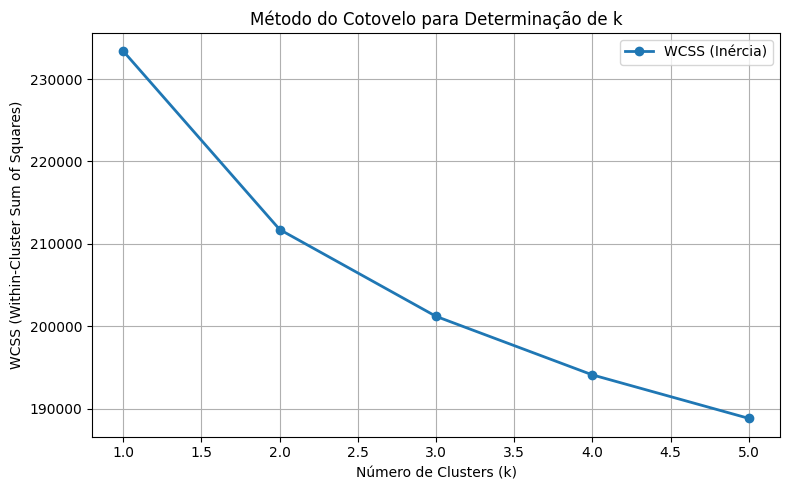

Melhor k (cotovelo): None


In [161]:
min_clusters = 1
max_clusters = 5


best_k, wcss = plot_elbow_wcss(X_sample, min_clusters, max_clusters)


**Avaliação do número de clusters com K variando de `1` a `8`**

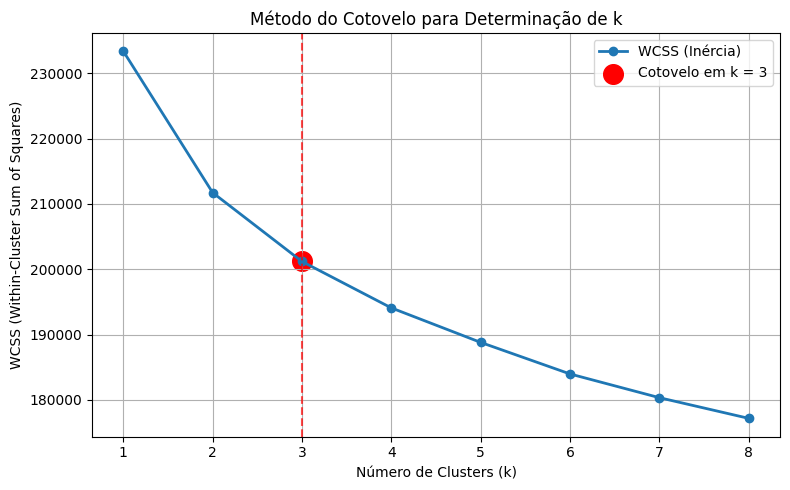

Melhor k (cotovelo): 3


In [162]:
min_clusters = 1
max_clusters = 8


best_k, wcss = plot_elbow_wcss(X_sample, min_clusters, max_clusters)


**Avaliação do número de clusters com K variando de `1` a `12`**

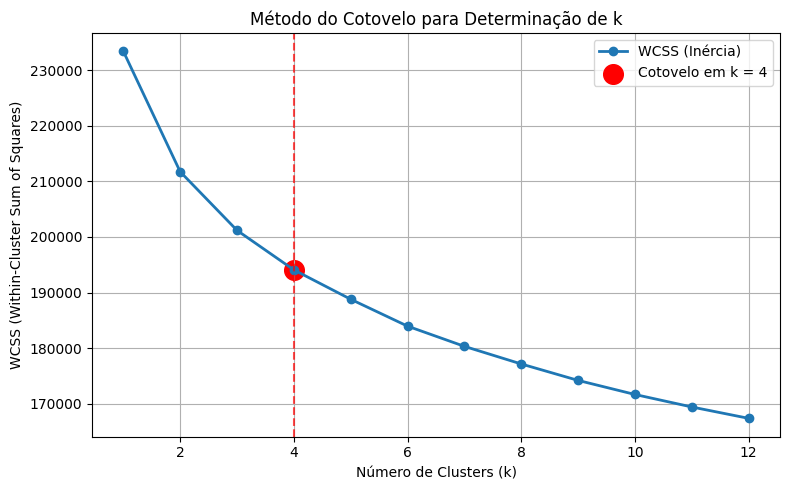

Melhor k (cotovelo): 4


In [163]:
min_clusters = 1
max_clusters = 12

best_k, wcss = plot_elbow_wcss(X_sample, min_clusters, max_clusters)


**Avaliação do número de clusters com K variando de `1` a `22`**

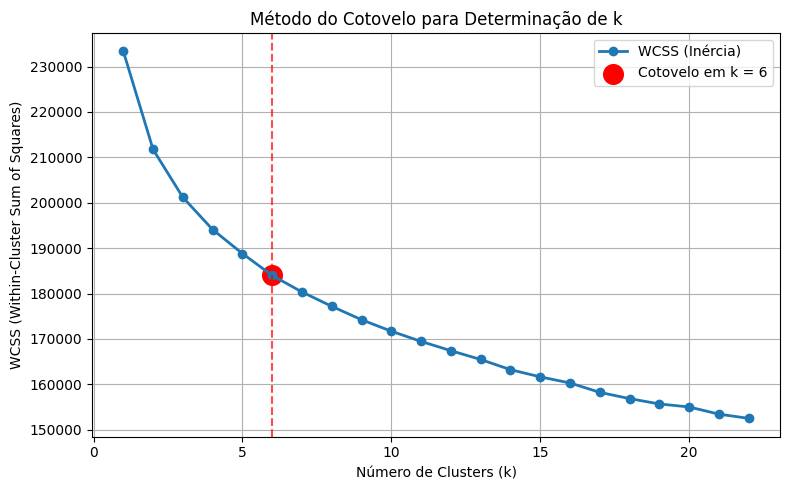

Melhor k (cotovelo): 6


In [164]:
min_clusters = 1
max_clusters = 22

best_k, wcss = plot_elbow_wcss(X_sample, min_clusters, max_clusters)

Como o `método do cotovelo` busca identificar um ponto de inflexão na curva de `WCSS`, alterações na `faixa de valores` de `k` testada podem modificar o formato da curva e, consequentemente, influenciar o valor do `k` considerado ideal. Por isso, foram realizados testes com quatro intervalos distintos:
- `k = 1-5`: Não há um cotovelo bem definido, mas visualmente `k=2` poderia ser considerado;
- `k = 1-8`: cotovelo em `k=3`;
- `k = 1-12`: cotovelo em `k=4`;
- `k = 1-22`: cotovelo em `k=6`.

Embora o objetivo prático da detecção de fraudes geralmente envolva a distinção entre `dois grupos principais` (transações fraudulentas e não fraudulentas), o algoritmo `KMeans` tende a agrupar com base em padrões gerais de similaridade nos dados. Isso explica por que valores de k maiores que 2 podem ter sido sugeridos pelo método.

#### **3.1.1.2. Silhouette Score**

A `Silhouette Score` baseia-se na proximidade entre os objetos de um cluster e na distância dos objetos de um cluster ao cluster mais próximo. Os valores variam de -1 a 1. Valores próximos a 1 indicam bons agrupamentos.

In [165]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(X, min_clusters=2, max_clusters=12):
    silhouette_scores = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        
        score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(score)

        print(f"Silhouette Score para k={k}: {score:.4f}")

    cluster_range = list(range(min_clusters, max_clusters + 1))
    best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]


    # Plotando os resultados
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o', linewidth=2, label='Silhouette Score')
    plt.scatter(best_k, max(silhouette_scores), s=200, c='red', label=f'Melhor k = {best_k}')
    plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)

    plt.grid(True)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Valor do Silhouette Score')
    plt.title('Silhouette Score para Determinação do Número Ideal de Clusters')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Retornar o melhor k
    print(f"\nMelhor número de clusters com base no Silhouette Score: k = {best_k}")
    return best_k


Silhouette Score para k=2: 0.0959
Silhouette Score para k=3: 0.0790
Silhouette Score para k=4: 0.0822
Silhouette Score para k=5: 0.0704
Silhouette Score para k=6: 0.0647
Silhouette Score para k=7: 0.0600
Silhouette Score para k=8: 0.0584
Silhouette Score para k=9: 0.0592
Silhouette Score para k=10: 0.0595
Silhouette Score para k=11: 0.0591
Silhouette Score para k=12: 0.0567
Silhouette Score para k=13: 0.0547
Silhouette Score para k=14: 0.0558
Silhouette Score para k=15: 0.0551
Silhouette Score para k=16: 0.0553
Silhouette Score para k=17: 0.0544
Silhouette Score para k=18: 0.0558
Silhouette Score para k=19: 0.0554
Silhouette Score para k=20: 0.0538
Silhouette Score para k=21: 0.0542
Silhouette Score para k=22: 0.0561


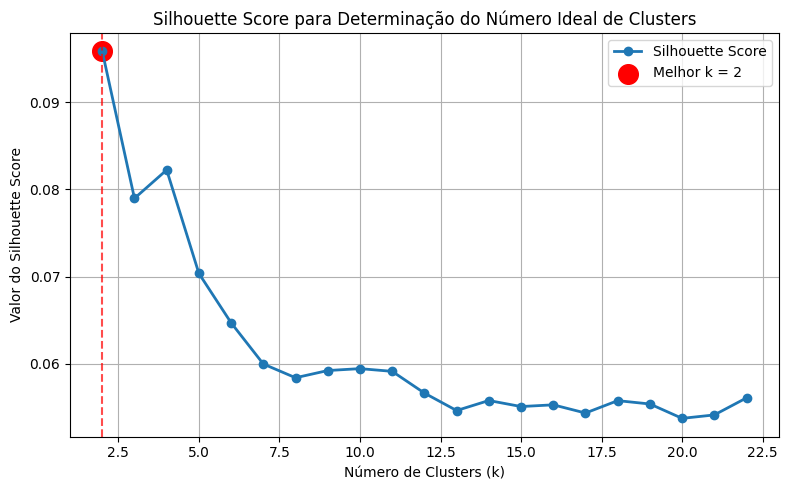


Melhor número de clusters com base no Silhouette Score: k = 2


In [166]:
best_k = plot_silhouette_scores(X_sample, min_clusters=2, max_clusters=22)


#### **3.1.1.3. Estatística GAP**

A `Estatística Gap` compara a dispersão de um agrupamento nos dados reais com a dispersão esperada em um conjunto de dados de referência aleatório, sem estrutura de cluster. Ela também é utilizada para estimar o número de grupos presentes em um conjunto de dados. Os valores variam entre 0 e infinito. Quanto maior o GAP, maior a evidência de que o agrupamento real tem estrutura melhor que o acaso.

In [167]:
import pandas as pd
import numpy as np

def optimalK(data, nrefs=3, min_clusters=2, max_clusters=12):
    gaps = []
    cluster_range = range(min_clusters, max_clusters + 1)
    all_results = []

    for k in cluster_range:
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            # respeita a distribuição e escala das variáveis originais
            mins = np.min(data, axis=0)
            maxs = np.max(data, axis=0)
            random_data = np.random.uniform(mins, maxs, size=data.shape)
            
            km = KMeans(n_clusters=k, n_init=10)
            km.fit(random_data)
            refDisps[i] = km.inertia_

        km = KMeans(n_clusters=k, n_init=10)
        km.fit(data)
        origDisp = km.inertia_

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps.append(gap)
        all_results.append({'clusterCount': k, 'gap': gap})

    resultsdf = pd.DataFrame(all_results)
    best_k = cluster_range[np.argmax(gaps)]
    
    return best_k, resultsdf

Optimal k is:  2


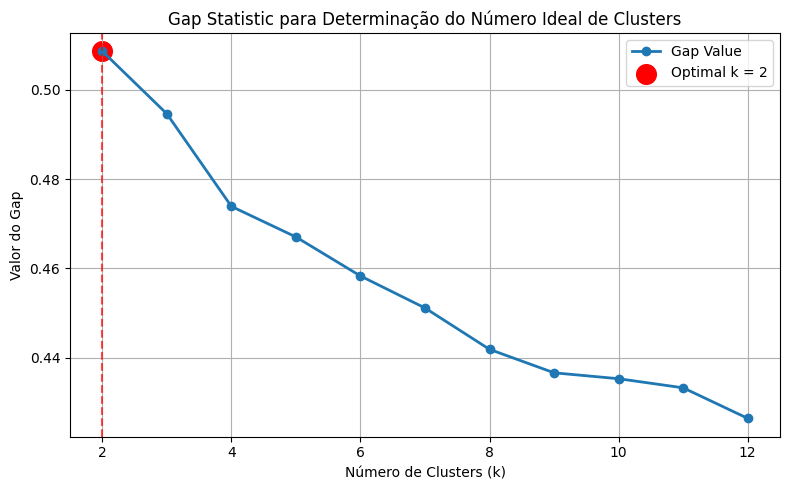

In [168]:
k, gapdf = optimalK(X_sample, nrefs=3, min_clusters=2, max_clusters=12)
print('Optimal k is: ', k)


plt.figure(figsize=(8, 5))
plt.plot(gapdf.clusterCount, gapdf.gap, marker='o', linewidth=2, label='Gap Value')
plt.scatter(k, gapdf[gapdf.clusterCount == k].gap, s=200, c='r', label=f'Optimal k = {k}')
plt.grid(True)
plt.axvline(x=k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Valor do Gap')
plt.title('Gap Statistic para Determinação do Número Ideal de Clusters')
plt.legend()
plt.tight_layout()
plt.show()

Apesar do `Elbow Method` sugerir valores mais altos de `k` (4 ou 6) dependendo da faixa testada, tanto o `Silhouette Score` quanto a `Estatística GAP` sugerem o valor de `k = 2` como a escolha mais apropriada.

Embora as transações fraudulentas possam estar concentradas em um desses grupos, essa sugestão de `k = 2` pode não ter uma relação direta com a fraude, uma vez que o `KMeans` não conhece os rótulos reais e agrupa com base na similaridade geométrica dos dados.

### **3.1.2 Treinamento e Avaliação**

In [169]:
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    adjusted_mutual_info_score,
    fowlkes_mallows_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
import pandas as pd

def avaliar_agrupamento(X, y_true, y_pred):
    total_fraude_base = y_true.sum()
    proporcao_fraude_base = y_true.mean()

    try:
        silhouette = silhouette_score(X, y_pred)
    except:
        silhouette = np.nan
    try:
        dbi = davies_bouldin_score(X, y_pred)
    except:
        dbi = np.nan
    try:
        chs = calinski_harabasz_score(X, y_pred)
    except:
        chs = np.nan

    ari = adjusted_rand_score(y_true, y_pred)
    ami = adjusted_mutual_info_score(y_true, y_pred)
    fmi = fowlkes_mallows_score(y_true, y_pred)

    df = pd.DataFrame({'cluster': y_pred, 'is_fraud': y_true})
    resumo = df.groupby('cluster')['is_fraud'].agg(
        n_transacoes='count',
        n_fraudes='sum'
    ).reset_index()

    resumo['proporcao_fraude'] = resumo['n_fraudes'] / resumo['n_transacoes']
    resumo['cobertura_fraude'] = resumo['n_fraudes'] / total_fraude_base
    resumo['f1_local'] = np.where(
        (resumo['proporcao_fraude'] + resumo['cobertura_fraude']) == 0,
        0,
        2 * resumo['proporcao_fraude'] * resumo['cobertura_fraude'] /
          (resumo['proporcao_fraude'] + resumo['cobertura_fraude'])
    )
    resumo['dens_rel'] = resumo['proporcao_fraude'] / proporcao_fraude_base

    return {
        'Silhouette': silhouette,
        'davies_bouldin_index': dbi,
        'calinski_Harabasz_index': chs,
        'ARI': ari,
        'AMI': ami,
        'FMI': fmi,
        'resumo_cluster': resumo.to_dict(orient='records'),
        'max_f1_local': resumo['f1_local'].max()
    }

def exibir_top_configuracoes(df_resultados, colunas_configuracoes, top_n=5):
    metricas = ['Silhouette', 'ARI', 'AMI', 'FMI', 'davies_bouldin_index', 'calinski_Harabasz_index']
    colunas_percentuais = ['proporcao_fraude', 'cobertura_fraude', 'f1_local']

    criterio_ordenacao = {
        'Silhouette': False,
        'ARI': False,
        'AMI': False,
        'FMI': False,
        'davies_bouldin_index': True,   # quanto menor, melhor
        'calinski_Harabasz_index': False
    }
    
    for metrica in metricas:
        print("\n" + "=" * 80)
        print(f"Top {top_n} configurações ordenadas por: {metrica}")
        print("=" * 80)
        ascending = criterio_ordenacao.get(metrica, False)
        df_ordenado = df_resultados.sort_values(by=metrica, ascending=ascending).head(top_n)

        for idx, row in df_ordenado.iterrows():
            print("=" * 80)
            configuracoes = ", ".join(f"{col}={repr(row[col])}" for col in colunas_configuracoes)
            print(f"Configuração: {configuracoes}")
            print(f"{metrica}: {row[metrica]:.4f}")
            
            resumo_df = pd.DataFrame(row['resumo_cluster']).sort_values(by='f1_local', ascending=False)
            resumo_df.set_index('cluster', inplace=True)

            resumo_formatado = resumo_df.copy()
            for col in colunas_percentuais:
                if col in resumo_formatado.columns:
                    resumo_formatado[col] = resumo_formatado[col].map(lambda x: f"{x * 100:.2f}%")
            
            display(resumo_formatado)

def exibir_top_configuracoes_por_max_f1(df_resultados, colunas_configuracoes, top_n=5):

    pd.set_option('display.width', 120)
    colunas_percentuais = ['proporcao_fraude', 'cobertura_fraude', 'f1_local']

    df_ordenado = df_resultados.sort_values(by='max_f1_local', ascending=False)

    for idx, row in df_ordenado.head(top_n).iterrows():
        print("=" * 60)
        configuracoes = ", ".join(f"{col}={repr(row[col])}" for col in colunas_configuracoes)
        print(f"Configuração: {configuracoes}")
        print(f"Maior valor do F1 local em um cluster: {row['max_f1_local'] * 100:.2f}%.")

        resumo_df = pd.DataFrame(row['resumo_cluster'])
        resumo_df.set_index('cluster', inplace=True)
        resumo_df = resumo_df.sort_values(by='f1_local', ascending=False)

        resumo_formatado = resumo_df.copy()
        for col in colunas_percentuais:
            if col in resumo_formatado.columns:
                resumo_formatado[col] = resumo_formatado[col].map(lambda x: f"{x * 100:.2f}%")

        print(resumo_formatado)



In [170]:
from sklearn.cluster import KMeans

import pandas as pd
from itertools import product

def avaliar_kmeans_variando_hiperparametros(X, y_true, 
                                            cluster_range=range(2, 11),
                                            n_init_options=[20],
                                            max_iter_options=[300],
                                            init_options=['k-means++', 'random'],
                                            random_state=42):
    resultados = []

    for n_clusters, n_init, max_iter, init in product(cluster_range, n_init_options, max_iter_options, init_options):

        model = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, init=init, random_state=random_state)
        y_pred = model.fit_predict(X)

        aval = avaliar_agrupamento(X, y_true, y_pred)
        aval.update({
            'n_clusters': n_clusters,
            'n_init': n_init,
            'max_iter': max_iter,
            'init': init
        })

        resultados.append(aval)

    return pd.DataFrame(resultados)

In [171]:
df_resultados_kmeans = avaliar_kmeans_variando_hiperparametros(
    X_sample, y_true,
    cluster_range=range(2, 11),
    n_init_options=[10, 20],
    max_iter_options=[100, 300],
    init_options = ['k-means++', 'random']
)

# Salvar o df_resultados com métricas
df_resultados_kmeans.to_csv("../data/processed/results/fraudTrain_1pct/kmeans_resultados.csv", index=False)


#### **3.1.2.1. Top Configurações de Clustering por Métrica de Avaliação - KMeans**

In [172]:
import ast

colunas_config_kmeans = ['n_clusters', 'n_init', 'max_iter', 'init']

df_resultados_kmeans = pd.read_csv("../data/processed/results/fraudTrain_1pct/kmeans_resultados.csv")

df_resultados_kmeans['resumo_cluster'] = df_resultados_kmeans['resumo_cluster'].apply(ast.literal_eval)

exibir_top_configuracoes(df_resultados_kmeans, colunas_config_kmeans, top_n=5)


Top 5 configurações ordenadas por: Silhouette
Configuração: n_clusters=2, n_init=10, max_iter=100, init='k-means++'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=100, init='random'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=300, init='k-means++'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=300, init='random'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=20, max_iter=100, init='k-means++'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890


Top 5 configurações ordenadas por: ARI
Configuração: n_clusters=4, n_init=20, max_iter=300, init='random'
ARI: 0.0007


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                1724         17            0.99%           22.67%    1.89%  1.704733
0                3259         28            0.86%           37.33%    1.68%  1.485315
2                4079         22            0.54%           29.33%    1.06%  0.932425
3                3904          8            0.20%           10.67%    0.40%  0.354262

Configuração: n_clusters=4, n_init=20, max_iter=100, init='random'
ARI: 0.0007


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                1724         17            0.99%           22.67%    1.89%  1.704733
0                3259         28            0.86%           37.33%    1.68%  1.485315
2                4079         22            0.54%           29.33%    1.06%  0.932425
3                3904          8            0.20%           10.67%    0.40%  0.354262

Configuração: n_clusters=4, n_init=10, max_iter=100, init='random'
ARI: 0.0007


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                1718         17            0.99%           22.67%    1.90%  1.710687
1                3270         28            0.86%           37.33%    1.67%  1.480318
2                4077         22            0.54%           29.33%    1.06%  0.932882
0                3901          8            0.21%           10.67%    0.40%  0.354535

Configuração: n_clusters=4, n_init=10, max_iter=300, init='random'
ARI: 0.0007


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                1718         17            0.99%           22.67%    1.90%  1.710687
1                3270         28            0.86%           37.33%    1.67%  1.480318
2                4077         22            0.54%           29.33%    1.06%  0.932882
0                3901          8            0.21%           10.67%    0.40%  0.354535

Configuração: n_clusters=4, n_init=10, max_iter=300, init='k-means++'
ARI: 0.0003


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                1547         13            0.84%           17.33%    1.60%  1.452773
3                3715         25            0.67%           33.33%    1.32%  1.163392
2                4082         22            0.54%           29.33%    1.06%  0.931739
1                3622         15            0.41%           20.00%    0.81%  0.715958


Top 5 configurações ordenadas por: AMI
Configuração: n_clusters=7, n_init=20, max_iter=300, init='k-means++'
AMI: 0.0011


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
4                1787         22            1.23%           29.33%    2.36%  2.128349
2                1302         12            0.92%           16.00%    1.74%  1.593364
1                2138         17            0.80%           22.67%    1.54%  1.374630
3                1516         11            0.73%           14.67%    1.38%  1.254406
0                2192          5            0.23%            6.67%    0.44%  0.394343
6                1993          4            0.20%            5.33%    0.39%  0.346974
5                2038          4            0.20%            5.33%    0.38%  0.339313

Configuração: n_clusters=7, n_init=20, max_iter=100, init='k-means++'
AMI: 0.0011


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
4                1787         22            1.23%           29.33%    2.36%  2.128349
2                1302         12            0.92%           16.00%    1.74%  1.593364
1                2138         17            0.80%           22.67%    1.54%  1.374630
3                1516         11            0.73%           14.67%    1.38%  1.254406
0                2192          5            0.23%            6.67%    0.44%  0.394343
6                1993          4            0.20%            5.33%    0.39%  0.346974
5                2038          4            0.20%            5.33%    0.38%  0.339313

Configuração: n_clusters=10, n_init=20, max_iter=300, init='random'
AMI: 0.0010


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
8                1493         21            1.41%           28.00%    2.68%  2.431668
1                1097         10            0.91%           13.33%    1.71%  1.575934
0                1264         10            0.79%           13.33%    1.49%  1.367722
5                1131          7            0.62%            9.33%    1.16%  1.069991
4                1517          9            0.59%           12.00%    1.13%  1.025656
2                1144          6            0.52%            8.00%    0.98%  0.906713
9                 810          3            0.37%            4.00%    0.68%  0.640296
3                1413          5            0.35%            6.67%    0.67%  0.611748
6                1402          4            0.29%            5.33%    0.54%  0.493238
7                1695          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=10, n_init=20, max_iter=100, init='random'
AMI: 0.0010


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
8                1493         21            1.41%           28.00%    2.68%  2.431668
1                1097         10            0.91%           13.33%    1.71%  1.575934
0                1264         10            0.79%           13.33%    1.49%  1.367722
5                1131          7            0.62%            9.33%    1.16%  1.069991
4                1517          9            0.59%           12.00%    1.13%  1.025656
2                1144          6            0.52%            8.00%    0.98%  0.906713
9                 810          3            0.37%            4.00%    0.68%  0.640296
3                1413          5            0.35%            6.67%    0.67%  0.611748
6                1402          4            0.29%            5.33%    0.54%  0.493238
7                1695          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=10, n_init=10, max_iter=100, init='random'
AMI: 0.0010


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
8                1493         21            1.41%           28.00%    2.68%  2.431668
1                1097         10            0.91%           13.33%    1.71%  1.575934
0                1264         10            0.79%           13.33%    1.49%  1.367722
5                1131          7            0.62%            9.33%    1.16%  1.069991
4                1517          9            0.59%           12.00%    1.13%  1.025656
2                1144          6            0.52%            8.00%    0.98%  0.906713
9                 810          3            0.37%            4.00%    0.68%  0.640296
3                1413          5            0.35%            6.67%    0.67%  0.611748
6                1402          4            0.29%            5.33%    0.54%  0.493238
7                1695          0            0.00%            0.00%    0.00%  0.000000


Top 5 configurações ordenadas por: FMI
Configuração: n_clusters=2, n_init=10, max_iter=100, init='k-means++'
FMI: 0.7347


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=100, init='random'
FMI: 0.7347


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=300, init='k-means++'
FMI: 0.7347


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=300, init='random'
FMI: 0.7347


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=20, max_iter=100, init='k-means++'
FMI: 0.7347


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890


Top 5 configurações ordenadas por: davies_bouldin_index
Configuração: n_clusters=10, n_init=20, max_iter=100, init='k-means++'
davies_bouldin_index: 2.8607


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
5                1473         17            1.15%           22.67%    2.20%  1.995221
6                1057          9            0.85%           12.00%    1.59%  1.472015
7                1211         10            0.83%           13.33%    1.56%  1.427581
0                1343         10            0.74%           13.33%    1.41%  1.287267
8                1540          9            0.58%           12.00%    1.11%  1.010338
9                1142          6            0.53%            8.00%    0.99%  0.908301
2                 810          4            0.49%            5.33%    0.90%  0.853728
4                1400          4            0.29%            5.33%    0.54%  0.493943
1                1399          3            0.21%            4.00%    0.41%  0.370722
3                1591          3            0.19%            4.00%    0.36%  0.325984

Configuração: n_clusters=10, n_init=20, max_iter=300, init='k-means++'
davies_bouldin_index: 2.8607


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
5                1473         17            1.15%           22.67%    2.20%  1.995221
6                1057          9            0.85%           12.00%    1.59%  1.472015
7                1211         10            0.83%           13.33%    1.56%  1.427581
0                1343         10            0.74%           13.33%    1.41%  1.287267
8                1540          9            0.58%           12.00%    1.11%  1.010338
9                1142          6            0.53%            8.00%    0.99%  0.908301
2                 810          4            0.49%            5.33%    0.90%  0.853728
4                1400          4            0.29%            5.33%    0.54%  0.493943
1                1399          3            0.21%            4.00%    0.41%  0.370722
3                1591          3            0.19%            4.00%    0.36%  0.325984

Configuração: n_clusters=10, n_init=10, max_iter=300, init='k-means++'
davies_bouldin_index: 2.8607


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
5                1473         17            1.15%           22.67%    2.20%  1.995221
6                1057          9            0.85%           12.00%    1.59%  1.472015
7                1211         10            0.83%           13.33%    1.56%  1.427581
0                1343         10            0.74%           13.33%    1.41%  1.287267
8                1540          9            0.58%           12.00%    1.11%  1.010338
9                1142          6            0.53%            8.00%    0.99%  0.908301
2                 810          4            0.49%            5.33%    0.90%  0.853728
4                1400          4            0.29%            5.33%    0.54%  0.493943
1                1399          3            0.21%            4.00%    0.41%  0.370722
3                1591          3            0.19%            4.00%    0.36%  0.325984

Configuração: n_clusters=10, n_init=10, max_iter=100, init='k-means++'
davies_bouldin_index: 2.8607


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
5                1473         17            1.15%           22.67%    2.20%  1.995221
6                1057          9            0.85%           12.00%    1.59%  1.472015
7                1211         10            0.83%           13.33%    1.56%  1.427581
0                1343         10            0.74%           13.33%    1.41%  1.287267
8                1540          9            0.58%           12.00%    1.11%  1.010338
9                1142          6            0.53%            8.00%    0.99%  0.908301
2                 810          4            0.49%            5.33%    0.90%  0.853728
4                1400          4            0.29%            5.33%    0.54%  0.493943
1                1399          3            0.21%            4.00%    0.41%  0.370722
3                1591          3            0.19%            4.00%    0.36%  0.325984

Configuração: n_clusters=10, n_init=20, max_iter=300, init='random'
davies_bouldin_index: 2.8632


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
8                1493         21            1.41%           28.00%    2.68%  2.431668
1                1097         10            0.91%           13.33%    1.71%  1.575934
0                1264         10            0.79%           13.33%    1.49%  1.367722
5                1131          7            0.62%            9.33%    1.16%  1.069991
4                1517          9            0.59%           12.00%    1.13%  1.025656
2                1144          6            0.52%            8.00%    0.98%  0.906713
9                 810          3            0.37%            4.00%    0.68%  0.640296
3                1413          5            0.35%            6.67%    0.67%  0.611748
6                1402          4            0.29%            5.33%    0.54%  0.493238
7                1695          0            0.00%            0.00%    0.00%  0.000000


Top 5 configurações ordenadas por: calinski_Harabasz_index
Configuração: n_clusters=2, n_init=10, max_iter=100, init='k-means++'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=100, init='random'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=300, init='k-means++'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=10, max_iter=300, init='random'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=20, max_iter=100, init='k-means++'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

**Comparativo do melhor resultado obtido por cada métrica**

As métricas `Silhouette Score`, `Davies-Bouldin Index` e `Calinski-Harabasz Score` não conhecem os rótulos verdadeiros. Elas avaliam a estrutura interna dos clusters, ou seja, o quão compactos e bem separados os grupos estão.

Já as métricas `Adjusted Rand Index (ARI)`, `Adjusted Mutual Information (AMI)` e `Fowlkes-Mallows Index (FMI)` comparam os rótulos previstos (clusters) com os rótulos reais nos agrupamentos.

A tabela abaixo apresenta a melhor configuração identificada para cada métrica. Os valores de "Proporção de fraudes no melhor cluster", "Cobertura de fraudes pelo melhor cluster" e "	F1-score do melhor cluster" referem-se ao desempenho obtido no cluster com maior proporção de fraudes para essa configuração.

|Métrica|Intervalo de Valores|Melhor Valor|Melhor Configuração (n_clusters)|Proporção de fraudes no melhor cluster|Cobertura de fraudes pelo melhor cluster|F1-score do melhor cluster|
|---|---|---|---|---|---|---|
|Silhouette|[-1, 1] -> Mais alto, melhor|0.0959|2|0.59%|66.67%|1.17%|
|Davies-Bouldin Index|[0, ∞) -> Mais baixo, melhor|2.8607|10|1.15%|22.67%|2.20%|
|Calinski-Harabasz Score|[0, ∞) -> Mais alto, melhor|1325.91|2|0.59%|66.67%|1.17%|
|Adjusted Rand Index (ARI)|[-1, 1] -> Mais alto, melhor|0.0007|4|0.99%|22.67%|1.89%|
|Adjusted Mutual Information (AMI)|[0, 1] -> Mais alto, melhor|0.0011|7|1.23%|29.33%|2.36%|
|Fowlkes-Mallows Index (FMI) |[0, 1] -> Mais alto, melhor|0.7347|2|0.59%|66.67%|1.17%|

Apesar das métricas `Silhouette Score`, `Calinski-Harabasz Score` e  `Fowlkes-Mallows Index (FMI)` terem indicado um melhor resultado para configurações com `k=2`, esses agrupamentos resultaram em clusters com proporções de fraude próximas à média da base (`0,59%`). Além disso, os dois clusters apresentaram proporções internas de fraude similares.

Já as métricas `ARI`, `AMI` e `Davies-Bouldin Index`, embora tenham apresentado configurações com maior número de clusters, permitiram identificar grupos com maiores proporções de fraude. No entanto, essas configurações resultaram em uma fragmentação das fraudes entre vários clusters, dificultando sua concentração em um único grupo e gerando uma elevada taxa de falsos positivos nos clusters mais densos.

#### **3.1.2.2. Configurações com Melhor Desempenho Local (F1) por Cluster - KMeans**

In [173]:
exibir_top_configuracoes_por_max_f1(df_resultados_kmeans, colunas_config_kmeans)

Configuração: n_clusters=10, n_init=10, max_iter=100, init='random'
Maior valor do F1 local em um cluster: 2.68%.
         n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
8                1493         21            1.41%           28.00%    2.68%  2.431668
1                1097         10            0.91%           13.33%    1.71%  1.575934
0                1264         10            0.79%           13.33%    1.49%  1.367722
5                1131          7            0.62%            9.33%    1.16%  1.069991
4                1517          9            0.59%           12.00%    1.13%  1.025656
2                1144          6            0.52%            8.00%    0.98%  0.906713
9                 810          3            0.37%            4.00%    0.68%  0.640296
3                1413          5            0.35%            6.67%    0.67%  0.611748
6                1402     

         n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
8                1493         21            1.41%           28.00%    2.68%  2.431668
1                1097         10            0.91%           13.33%    1.71%  1.575934
0                1264         10            0.79%           13.33%    1.49%  1.367722
5                1131          7            0.62%            9.33%    1.16%  1.069991
4                1517          9            0.59%           12.00%    1.13%  1.025656
2                1144          6            0.52%            8.00%    0.98%  0.906713
9                 810          3            0.37%            4.00%    0.68%  0.640296
3                1413          5            0.35%            6.67%    0.67%  0.611748
6                1402          4            0.29%            5.33%    0.54%  0.493238
7                1695          0            0.00%     

O melhor agrupamento com o `KMeans`, , com base no `F1-score` do melhor cluster, foi obtido com `k=10`, onde um cluster apresentou `F1-score` de `2.68%`. Esse grupo continha uma proporção interna de fraudes de `1.41%`, com `28%` de cobertura das fraudes totais. Apesar do desempenho relativamente superior em relação às demais configurações, o cluster ainda apresentava `98.59%` de transações não fraudulentas, resultando em uma alta taxa de falsos positivos.

Além disso, a divisão em `dez` grupos distintos dificulta a identificação, de forma não supervisionada, do cluster mais relevante para a detecção de fraudes, já que não há indicação clara de qual grupo concentra os casos com maior proporção ou cobertura de fraudes.


As configurações que apresentaram esse resultado foram as seguintes:
- `n_clusters = 10`
- `n_init = 10 ou 20`
- `max_iter = 100 ou 300`
- `init = 'random'`

|Configuração|Cluster com maior proporção|Proporção de fraudes no melhor cluster|Cobertura de fraudes pelo melhor cluster|F1-score do melhor cluster|
|---|---|---|---|---|
|n_clusters=10, n_init=10, max_iter=100, init='random'|Cluster 8 (21 fraudes em 1.493 transações)|1.41%|28.00%|2.68%|
|n_clusters=10, n_init=10, max_iter=300, init='random'|Cluster 8 (21 fraudes em 1.493 transações)|1.41%|28.00%|2.68%|
|n_clusters=10, n_init=20, max_iter=300, init='random'|Cluster 8 (21 fraudes em 1.493 transações)|1.41%|28.00%|2.68%|
|n_clusters=10, n_init=20, max_iter=100, init='random'|Cluster 8 (21 fraudes em 1.493 transações)|1.41%|28.00%|2.68%|

## **3.2. Agglomerative Clustering**

In [174]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from itertools import product

def avaliar_agglomerative_clustering_variando_hiperparametros(X, y_true,
                                                               cluster_range=range(2, 11),
                                                               distance_metrics=['euclidean', 'manhattan', 'cosine'],
                                                               linkage_methods=['ward', 'complete', 'average', 'single']):
    resultados = []

    for n_clusters, metric, linkage in product(cluster_range, distance_metrics, linkage_methods):
        if linkage == 'ward' and metric != 'euclidean':
            continue

        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
        y_pred = model.fit_predict(X)

        aval = avaliar_agrupamento(X, y_true, y_pred)
        aval.update({
            'n_clusters': n_clusters,
            'metric': metric,
            'linkage': linkage
        })

        resultados.append(aval)

    return pd.DataFrame(resultados)


In [175]:
df_resultados_agglomerative_clustering = avaliar_agglomerative_clustering_variando_hiperparametros(
    X_sample, y_true,
    cluster_range=range(2, 11),
    distance_metrics = ['euclidean', 'manhattan', 'cosine'],
    linkage_methods = ['ward', 'complete', 'average', 'single']
)

# Salvar o df_resultados com métricas
df_resultados_agglomerative_clustering.to_csv("../data/processed/results/fraudTrain_1pct/agglomerative_clustering_resultados.csv", index=False)


#### **3.2.1. Top Configurações de Clustering por Métrica de Avaliação - Agglomerative Clustering**

In [176]:
import ast

colunas_config_agglomerative = ['n_clusters', 'metric', 'linkage']

df_resultados_agglomerative_clustering = pd.read_csv("../data/processed/results/fraudTrain_1pct/agglomerative_clustering_resultados.csv")

df_resultados_agglomerative_clustering['resumo_cluster'] = df_resultados_agglomerative_clustering['resumo_cluster'].apply(ast.literal_eval)

exibir_top_configuracoes(df_resultados_agglomerative_clustering, colunas_config_agglomerative, top_n=5)



Top 5 configurações ordenadas por: Silhouette
Configuração: n_clusters=2, metric='manhattan', linkage='single'
Silhouette: 0.3811


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12964         75            0.58%          100.00%    1.15%  1.000154
1                   2          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, metric='euclidean', linkage='complete'
Silhouette: 0.3785


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12948         75            0.58%          100.00%    1.15%   1.00139
1                  18          0            0.00%            0.00%    0.00%   0.00000

Configuração: n_clusters=2, metric='manhattan', linkage='average'
Silhouette: 0.3785


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12948         75            0.58%          100.00%    1.15%   1.00139
1                  18          0            0.00%            0.00%    0.00%   0.00000

Configuração: n_clusters=2, metric='euclidean', linkage='average'
Silhouette: 0.3785


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12948         75            0.58%          100.00%    1.15%   1.00139
1                  18          0            0.00%            0.00%    0.00%   0.00000

Configuração: n_clusters=2, metric='manhattan', linkage='complete'
Silhouette: 0.3785


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12948         75            0.58%          100.00%    1.15%   1.00139
1                  18          0            0.00%            0.00%    0.00%   0.00000


Top 5 configurações ordenadas por: ARI
Configuração: n_clusters=5, metric='euclidean', linkage='average'
ARI: 0.0622


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   5          3           60.00%            4.00%    7.50%  103.728000
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12921         71            0.55%           94.67%    1.09%    0.949964
1                  18          0            0.00%            0.00%    0.00%    0.000000
3                   1          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=7, metric='euclidean', linkage='average'
ARI: 0.0550


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   5          3           60.00%            4.00%    7.50%  103.728000
6                  19          1            5.26%            1.33%    2.13%    9.098947
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12878         70            0.54%           93.33%    1.08%    0.939711
1                  18          0            0.00%            0.00%    0.00%    0.000000
3                   1          0            0.00%            0.00%    0.00%    0.000000
5                  24          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=6, metric='euclidean', linkage='average'
ARI: 0.0499


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   5          3           60.00%            4.00%    7.50%  103.728000
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12897         71            0.55%           94.67%    1.09%    0.951731
1                  18          0            0.00%            0.00%    0.00%    0.000000
3                   1          0            0.00%            0.00%    0.00%    0.000000
5                  24          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=5, metric='manhattan', linkage='average'
ARI: 0.0456


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   2          2          100.00%            2.67%    5.19%  172.880000
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12921         72            0.56%           96.00%    1.11%    0.963343
1                   4          0            0.00%            0.00%    0.00%    0.000000
3                  18          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=6, metric='manhattan', linkage='average'
ARI: 0.0442


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   2          2          100.00%            2.67%    5.19%  172.880000
2                  21          1            4.76%            1.33%    2.08%    8.232381
1               12918         72            0.56%           96.00%    1.11%    0.963567
0                   4          0            0.00%            0.00%    0.00%    0.000000
3                  18          0            0.00%            0.00%    0.00%    0.000000
5                   3          0            0.00%            0.00%    0.00%    0.000000


Top 5 configurações ordenadas por: AMI
Configuração: n_clusters=5, metric='euclidean', linkage='average'
AMI: 0.0320


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   5          3           60.00%            4.00%    7.50%  103.728000
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12921         71            0.55%           94.67%    1.09%    0.949964
1                  18          0            0.00%            0.00%    0.00%    0.000000
3                   1          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=5, metric='manhattan', linkage='average'
AMI: 0.0274


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   2          2          100.00%            2.67%    5.19%  172.880000
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12921         72            0.56%           96.00%    1.11%    0.963343
1                   4          0            0.00%            0.00%    0.00%    0.000000
3                  18          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=6, metric='manhattan', linkage='average'
AMI: 0.0263


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   2          2          100.00%            2.67%    5.19%  172.880000
2                  21          1            4.76%            1.33%    2.08%    8.232381
1               12918         72            0.56%           96.00%    1.11%    0.963567
0                   4          0            0.00%            0.00%    0.00%    0.000000
3                  18          0            0.00%            0.00%    0.00%    0.000000
5                   3          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=7, metric='manhattan', linkage='average'
AMI: 0.0262


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   2          2          100.00%            2.67%    5.19%  172.880000
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12918         72            0.56%           96.00%    1.11%    0.963567
1                  18          0            0.00%            0.00%    0.00%    0.000000
3                   2          0            0.00%            0.00%    0.00%    0.000000
5                   3          0            0.00%            0.00%    0.00%    0.000000
6                   2          0            0.00%            0.00%    0.00%    0.000000

Configuração: n_clusters=6, metric='euclidean', linkage='average'
AMI: 0.0260


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                   5          3           60.00%            4.00%    7.50%  103.728000
2                  21          1            4.76%            1.33%    2.08%    8.232381
0               12897         71            0.55%           94.67%    1.09%    0.951731
1                  18          0            0.00%            0.00%    0.00%    0.000000
3                   1          0            0.00%            0.00%    0.00%    0.000000
5                  24          0            0.00%            0.00%    0.00%    0.000000


Top 5 configurações ordenadas por: FMI
Configuração: n_clusters=2, metric='cosine', linkage='single'
FMI: 0.9942


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12965         75            0.58%          100.00%    1.15%  1.000077
1                   1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, metric='manhattan', linkage='single'
FMI: 0.9941


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12964         75            0.58%          100.00%    1.15%  1.000154
1                   2          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=3, metric='cosine', linkage='single'
FMI: 0.9941


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12964         75            0.58%          100.00%    1.15%  1.000154
1                   1          0            0.00%            0.00%    0.00%  0.000000
2                   1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=3, metric='manhattan', linkage='single'
FMI: 0.9940


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
2               12963         75            0.58%          100.00%    1.15%  1.000231
0                   2          0            0.00%            0.00%    0.00%  0.000000
1                   1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=4, metric='cosine', linkage='single'
FMI: 0.9940


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12963         75            0.58%          100.00%    1.15%  1.000231
1                   1          0            0.00%            0.00%    0.00%  0.000000
2                   1          0            0.00%            0.00%    0.00%  0.000000
3                   1          0            0.00%            0.00%    0.00%  0.000000


Top 5 configurações ordenadas por: davies_bouldin_index
Configuração: n_clusters=4, metric='manhattan', linkage='single'
davies_bouldin_index: 0.5585


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12963         75            0.58%          100.00%    1.15%  1.000231
1                   1          0            0.00%            0.00%    0.00%  0.000000
2                   1          0            0.00%            0.00%    0.00%  0.000000
3                   1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=5, metric='manhattan', linkage='single'
davies_bouldin_index: 0.5918


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12962         75            0.58%          100.00%    1.15%  1.000309
1                   1          0            0.00%            0.00%    0.00%  0.000000
2                   1          0            0.00%            0.00%    0.00%  0.000000
3                   1          0            0.00%            0.00%    0.00%  0.000000
4                   1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=6, metric='manhattan', linkage='single'
davies_bouldin_index: 0.6125


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12960         75            0.58%          100.00%    1.15%  1.000463
1                   1          0            0.00%            0.00%    0.00%  0.000000
2                   2          0            0.00%            0.00%    0.00%  0.000000
3                   1          0            0.00%            0.00%    0.00%  0.000000
4                   1          0            0.00%            0.00%    0.00%  0.000000
5                   1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=7, metric='manhattan', linkage='single'
davies_bouldin_index: 0.7115


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12956         75            0.58%          100.00%    1.15%  1.000772
1                   1          0            0.00%            0.00%    0.00%  0.000000
2                   4          0            0.00%            0.00%    0.00%  0.000000
3                   1          0            0.00%            0.00%    0.00%  0.000000
4                   1          0            0.00%            0.00%    0.00%  0.000000
5                   1          0            0.00%            0.00%    0.00%  0.000000
6                   2          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=3, metric='manhattan', linkage='single'
davies_bouldin_index: 0.7417


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
2               12963         75            0.58%          100.00%    1.15%  1.000231
0                   2          0            0.00%            0.00%    0.00%  0.000000
1                   1          0            0.00%            0.00%    0.00%  0.000000


Top 5 configurações ordenadas por: calinski_Harabasz_index
Configuração: n_clusters=2, metric='euclidean', linkage='ward'
calinski_Harabasz_index: 1278.3718


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                8513         51            0.60%           68.00%    1.19%  1.035696
1                4453         24            0.54%           32.00%    1.06%  0.931758

Configuração: n_clusters=2, metric='cosine', linkage='average'
calinski_Harabasz_index: 1269.6815


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                8505         50            0.59%           66.67%    1.17%  1.016343
1                4461         25            0.56%           33.33%    1.10%  0.968841

Configuração: n_clusters=2, metric='cosine', linkage='complete'
calinski_Harabasz_index: 1152.8275


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                8797         55            0.63%           73.33%    1.24%  1.080868
1                4169         20            0.48%           26.67%    0.94%  0.829360

Configuração: n_clusters=3, metric='euclidean', linkage='ward'
calinski_Harabasz_index: 846.0364


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
2                3668         25            0.68%           33.33%    1.34%  1.178299
1                4453         24            0.54%           32.00%    1.06%  0.931758
0                4845         26            0.54%           34.67%    1.06%  0.927736

Configuração: n_clusters=3, metric='cosine', linkage='average'
calinski_Harabasz_index: 811.3821


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
2                1445         13            0.90%           17.33%    1.71%  1.555322
1                4461         25            0.56%           33.33%    1.10%  0.968841
0                7060         37            0.52%           49.33%    1.04%  0.906028

**Comparativo do melhor resultado obtido por cada métrica**

A tabela abaixo apresenta a melhor configuração identificada para cada métrica. Os valores de "Proporção de fraudes no melhor cluster", "Cobertura de fraudes pelo melhor cluster" e "	F1-score do melhor cluster" referem-se ao desempenho obtido no cluster com maior proporção de fraudes para essa configuração.


|Métrica|Intervalo de Valores|Melhor Valor|Melhor Configuração (n_clusters-metric-linkage)|Proporção de fraudes no melhor cluster|Cobertura de fraudes pelo melhor cluster|F1-score do melhor cluster|
|---|---|---|---|---|---|---|
|Silhouette|[-1, 1] -> Mais alto, melhor|0.3811|2-manhattan-single|0.58%|100% (cluster com 99.98% das transações)|1.15%|
|Davies-Bouldin Index|[0, ∞) -> Mais baixo, melhor|0.5585|4-manhattan-single|0.58%|100% (cluster com 99.97% das transações)|1.15%|
|Calinski-Harabasz Score|[0, ∞) -> Mais alto, melhor|1278.3718|2-euclidean-ward|0.60%|68%|1.19%|
|Adjusted Rand Index (ARI)|[-1, 1] -> Mais alto, melhor|0.0622|5-euclidean-average|60% (cluster com 5 transações)|4%|7.50%|
|Adjusted Mutual Information (AMI)|[0, 1] -> Mais alto, melhor|0.0320|5-euclidean-average|60% (cluster com 5 transações)|4%|7.50%|
|Fowlkes-Mallows Index (FMI) |[0, 1] -> Mais alto, melhor|0.9942|2-cosine-single|0.58%|100% (cluster com 99.99% transações)|1.15%|


Apesar das métricas `Silhouette Score`, `Calinski-Harabasz Score` e  `Fowlkes-Mallows Index (FMI)` terem indicado melhor desempenho para configurações com `k=2`, os agrupamentos resultantes apresentaram proporções internas de fraude muito próximas à média da base, , semelhante ao observado na avaliação com `KMeans`. 

Já as métricas `ARI` e `AMI`, embora tenham apresentado configurações com maior número de clusters (`k=5`), permitiram identificar grupos com proporções de fraude elevadas (60%). No entanto, esses grupos eram muito pequenos, com apenas 5 transações.

Por fim, as métricas `Silhouette Score`, `FMI` e `Davies-Bouldin Index` geraram agrupamentos que alocaram praticamente todas as transações (mais de 99%) em um único cluster, incluindo todas as fraudes, resultando em 100% de cobertura.

#### **3.2.2. Configurações com Melhor Desempenho Local (F1) por Cluster - Agglomerative Clustering**

In [177]:
exibir_top_configuracoes_por_max_f1(df_resultados_agglomerative_clustering, colunas_config_agglomerative)

Configuração: n_clusters=10, metric='euclidean', linkage='average'
Maior valor do F1 local em um cluster: 16.88%.
         n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local    dens_rel
cluster                                                                                
4                  79         13           16.46%           17.33%   16.88%   28.448608
9                   5          3           60.00%            4.00%    7.50%  103.728000
6                  19          1            5.26%            1.33%    2.13%    9.098947
2                  21          1            4.76%            1.33%    2.08%    8.232381
3                 138          2            1.45%            2.67%    1.88%    2.505507
1                 831          6            0.72%            8.00%    1.32%    1.248231
0               11830         49            0.41%           65.33%    0.82%    0.716071
5                  24          0            0.00%            0.00%    0.00%    0.000000
7     

O algoritmo foi capaz de identificar clusters com `100%` de transações fraudulentas. No entanto, é importante citar que os clusters com `100%` de fraudes são muito pequenos, com apenas 2 transações, possuindo pouca representatividade estatística. 

O melhor agrupamento com o `Agglomerative Clustering`, com base no `F1-score` do melhor cluster, apresentou `F1-score` de `16.88%`. Esse grupo continha uma proporção interna de fraudes de `16.46%`, com `17.33%` de cobertura das fraudes totais. A divisão em `dez` grupos distintos dificulta a identificação, de forma não supervisionada, do cluster mais relevante para a detecção de fraudes, já que não há indicação clara de qual grupo concentra os casos com maior proporção ou cobertura de fraudes.

A configuração que produziu esse resultado foi:
- `k=10`
- `linkage='average'`
- `metric='euclidean'`


## **3.3 DBSCAN**

In [178]:
from sklearn.cluster import DBSCAN
import pandas as pd
from itertools import product

def avaliar_dbscan_variando_hiperparametros(X, y_true,
                                            eps_values=[0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5],
                                            min_samples_values=[3, 5, 7],
                                            distance_metrics=['euclidean', 'manhattan', 'cosine']):
    resultados = []

    for eps, min_samples, metric in product(eps_values, min_samples_values, distance_metrics):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        y_pred = model.fit_predict(X)
        n_clusters = len(set(y_pred))  # inclui o -1 (ruído)

        if n_clusters < 2:
            continue  # ignora resultados sem agrupamento real

        aval = avaliar_agrupamento(X, y_true, y_pred)
        aval.update({
            'eps': eps,
            'min_samples': min_samples,
            'metric': metric,
            'n_clusters': n_clusters
        })

        resultados.append(aval)

    return pd.DataFrame(resultados)


In [179]:
df_resultados_dbscan = avaliar_dbscan_variando_hiperparametros(
    X_sample, y_true,
    eps_values=[0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 2, 3, 5, 7, 9, 12, 15, 30],
    min_samples_values=[2, 3, 5, 7, 9, 12, 15],
    distance_metrics=['euclidean', 'manhattan', 'cosine']
)

# Salvar o df_resultados com métricas
df_resultados_dbscan.to_csv("../data/processed/results/fraudTrain_1pct/dbscan_resultados.csv", index=False)


#### **3.3.1. Top Configurações de Clustering por Métrica de Avaliação - DBSCAN**

In [180]:
import ast

colunas_config_dbscan = ['n_clusters', 'eps', 'min_samples', 'metric']

df_resultados_dbscan = pd.read_csv("../data/processed/results/fraudTrain_1pct/dbscan_resultados.csv")

df_resultados_dbscan['resumo_cluster'] = df_resultados_dbscan['resumo_cluster'].apply(ast.literal_eval)

exibir_top_configuracoes(df_resultados_dbscan, colunas_config_dbscan, top_n=5)
    


Top 5 configurações ordenadas por: Silhouette
Configuração: n_clusters=2, eps=15.0, min_samples=15, metric='manhattan'
Silhouette: 0.3977


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, eps=15.0, min_samples=12, metric='manhattan'
Silhouette: 0.3977


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, eps=5.0, min_samples=3, metric='euclidean'
Silhouette: 0.3785


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12948         75            0.58%          100.00%    1.15%   1.00139
1                  18          0            0.00%            0.00%    0.00%   0.00000

Configuração: n_clusters=2, eps=5.0, min_samples=9, metric='euclidean'
Silhouette: 0.3785


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0               12948         75            0.58%          100.00%    1.15%   1.00139
1                  18          0            0.00%            0.00%    0.00%   0.00000

Configuração: n_clusters=2, eps=5.0, min_samples=15, metric='euclidean'
Silhouette: 0.3785


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12948         75            0.58%          100.00%    1.15%   1.00139
-1                 18          0            0.00%            0.00%    0.00%   0.00000


Top 5 configurações ordenadas por: ARI
Configuração: n_clusters=2, eps=9.0, min_samples=12, metric='manhattan'
ARI: 0.0667


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                164          9            5.49%           12.00%    7.53%  9.487317
 0              12802         66            0.52%           88.00%    1.03%  0.891273

Configuração: n_clusters=2, eps=9.0, min_samples=9, metric='manhattan'
ARI: 0.0605


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                130          7            5.38%            9.33%    6.83%  9.308923
 0              12836         68            0.53%           90.67%    1.05%  0.915849

Configuração: n_clusters=2, eps=9.0, min_samples=7, metric='manhattan'
ARI: 0.0591


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                106          6            5.66%            8.00%    6.63%  9.785660
 0              12860         69            0.54%           92.00%    1.07%  0.927583

Configuração: n_clusters=14, eps=9.0, min_samples=2, metric='manhattan'
ARI: 0.0575


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local   dens_rel
cluster                                                                               
-1                 45          4            8.89%            5.33%    6.67%  15.367111
 3                  2          1           50.00%            1.33%    2.60%  86.440000
 0              12884         70            0.54%           93.33%    1.08%   0.939274
 1                  2          0            0.00%            0.00%    0.00%   0.000000
 2                  6          0            0.00%            0.00%    0.00%   0.000000
 4                  7          0            0.00%            0.00%    0.00%   0.000000
 5                  3          0            0.00%            0.00%    0.00%   0.000000
 6                  2          0            0.00%            0.00%    0.00%   0.000000
 7                  2          0            0.00%            0.00%    0.00%   0.000000
 8                  3          0            0.00%            0.00%    0.00%   0.000000
 9                  2          0            0.00%            0.00%    0.00%   0.000000
 10                 2          0            0.00%            0.00%    0.00%   0.000000
 11                 4          0            0.00%            0.00%    0.00%   0.000000
 12                 2          0            0.00%            0.00%    0.00%   0.000000

Configuração: n_clusters=2, eps=9.0, min_samples=15, metric='manhattan'
ARI: 0.0574


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                224         10            4.46%           13.33%    6.69%  7.717857
 0              12742         65            0.51%           86.67%    1.01%  0.881902


Top 5 configurações ordenadas por: AMI
Configuração: n_clusters=14, eps=9.0, min_samples=2, metric='manhattan'
AMI: 0.0185


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local   dens_rel
cluster                                                                               
-1                 45          4            8.89%            5.33%    6.67%  15.367111
 3                  2          1           50.00%            1.33%    2.60%  86.440000
 0              12884         70            0.54%           93.33%    1.08%   0.939274
 1                  2          0            0.00%            0.00%    0.00%   0.000000
 2                  6          0            0.00%            0.00%    0.00%   0.000000
 4                  7          0            0.00%            0.00%    0.00%   0.000000
 5                  3          0            0.00%            0.00%    0.00%   0.000000
 6                  2          0            0.00%            0.00%    0.00%   0.000000
 7                  2          0            0.00%            0.00%    0.00%   0.000000
 8                  3          0            0.00%            0.00%    0.00%   0.000000
 9                  2          0            0.00%            0.00%    0.00%   0.000000
 10                 2          0            0.00%            0.00%    0.00%   0.000000
 11                 4          0            0.00%            0.00%    0.00%   0.000000
 12                 2          0            0.00%            0.00%    0.00%   0.000000

Configuração: n_clusters=2, eps=9.0, min_samples=12, metric='manhattan'
AMI: 0.0183


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                164          9            5.49%           12.00%    7.53%  9.487317
 0              12802         66            0.52%           88.00%    1.03%  0.891273

Configuração: n_clusters=7, eps=9.0, min_samples=3, metric='manhattan'
AMI: 0.0159


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local   dens_rel
cluster                                                                               
-1                 59          5            8.47%            6.67%    7.46%  14.650847
 0              12884         70            0.54%           93.33%    1.08%   0.939274
 1                  7          0            0.00%            0.00%    0.00%   0.000000
 2                  3          0            0.00%            0.00%    0.00%   0.000000
 3                  3          0            0.00%            0.00%    0.00%   0.000000
 4                  4          0            0.00%            0.00%    0.00%   0.000000
 5                  6          0            0.00%            0.00%    0.00%   0.000000

Configuração: n_clusters=2, eps=9.0, min_samples=9, metric='manhattan'
AMI: 0.0156


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                130          7            5.38%            9.33%    6.83%  9.308923
 0              12836         68            0.53%           90.67%    1.05%  0.915849

Configuração: n_clusters=2, eps=9.0, min_samples=7, metric='manhattan'
AMI: 0.0151


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                106          6            5.66%            8.00%    6.63%  9.785660
 0              12860         69            0.54%           92.00%    1.07%  0.927583


Top 5 configurações ordenadas por: FMI
Configuração: n_clusters=2, eps=0.3, min_samples=15, metric='cosine'
FMI: 0.9942


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, eps=15.0, min_samples=12, metric='manhattan'
FMI: 0.9942


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, eps=15.0, min_samples=15, metric='manhattan'
FMI: 0.9942


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, eps=0.3, min_samples=2, metric='manhattan'
FMI: 0.9941


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1              12964         75            0.58%          100.00%    1.15%  1.000154
 0                  2          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, eps=1.1, min_samples=3, metric='euclidean'
FMI: 0.9940


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1              12963         75            0.58%          100.00%    1.15%  1.000231
 0                  3          0            0.00%            0.00%    0.00%  0.000000


Top 5 configurações ordenadas por: davies_bouldin_index
Configuração: n_clusters=2, eps=15.0, min_samples=12, metric='manhattan'
davies_bouldin_index: 0.4654


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, eps=15.0, min_samples=15, metric='manhattan'
davies_bouldin_index: 0.4654


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=3, eps=12.0, min_samples=2, metric='manhattan'
davies_bouldin_index: 0.7417


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12963         75            0.58%          100.00%    1.15%  1.000231
-1                  1          0            0.00%            0.00%    0.00%  0.000000
 1                  2          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=3, eps=5.0, min_samples=12, metric='euclidean'
davies_bouldin_index: 0.8443


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12948         75            0.58%          100.00%    1.15%   1.00139
-1                  1          0            0.00%            0.00%    0.00%   0.00000
 1                 17          0            0.00%            0.00%    0.00%   0.00000

Configuração: n_clusters=2, eps=0.3, min_samples=15, metric='cosine'
davies_bouldin_index: 0.9087


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
 0              12965         75            0.58%          100.00%    1.15%  1.000077
-1                  1          0            0.00%            0.00%    0.00%  0.000000


Top 5 configurações ordenadas por: calinski_Harabasz_index
Configuração: n_clusters=2, eps=3.0, min_samples=15, metric='euclidean'
calinski_Harabasz_index: 176.0937


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1               1390         25            1.80%           33.33%    3.41%  3.109353
 0              11576         50            0.43%           66.67%    0.86%  0.746717

Configuração: n_clusters=2, eps=3.0, min_samples=12, metric='euclidean'
calinski_Harabasz_index: 144.7515


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1               1078         23            2.13%           30.67%    3.99%  3.688534
 0              11888         52            0.44%           69.33%    0.87%  0.756205

Configuração: n_clusters=2, eps=3.0, min_samples=9, metric='euclidean'
calinski_Harabasz_index: 117.0759


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                785         21            2.68%           28.00%    4.88%  4.624815
 0              12181         54            0.44%           72.00%    0.88%  0.766400

Configuração: n_clusters=2, eps=3.0, min_samples=7, metric='euclidean'
calinski_Harabasz_index: 90.8446


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                607         19            3.13%           25.33%    5.57%  5.411400
 0              12359         56            0.45%           74.67%    0.90%  0.783338

Configuração: n_clusters=4, eps=7.0, min_samples=12, metric='manhattan'
calinski_Harabasz_index: 82.7833


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1               5712         61            1.07%           81.33%    2.11%  1.846232
 0               7240         14            0.19%           18.67%    0.38%  0.334298
 1                  7          0            0.00%            0.00%    0.00%  0.000000
 2                  7          0            0.00%            0.00%    0.00%  0.000000

**Comparativo do melhor resultado obtido por cada métrica**

A tabela abaixo apresenta a melhor configuração identificada para cada métrica. Os valores de "Proporção de fraudes no melhor cluster", "Cobertura de fraudes pelo melhor cluster" e "	F1-score do melhor cluster" referem-se ao desempenho obtido no cluster com maior proporção de fraudes para essa configuração.

|Métrica|Intervalo de Valores|Melhor Valor|Melhor Configuração (n_clusters-eps-min_samples-metric))|Proporção de fraudes no melhor cluster|Cobertura de fraudes pelo melhor cluster|F1-score do melhor cluster|
|---|---|---|---|---|---|---|
|Silhouette|[-1, 1] -> Mais alto, melhor|0.3977|2-15.0-15-manhattan|0.58%|100.00%|1.15%|
|Davies-Bouldin Index|[0, ∞) -> Mais baixo, melhor|0.4654|2-15.0-12-manhattan|0.58%|100.00%|1.15%|
|Calinski-Harabasz Score|[0, ∞) -> Mais alto, melhor|176.0937|2-3.0-15-euclidean|1.80%|33.33%|3.41%|
|Adjusted Rand Index (ARI)|[-1, 1] -> Mais alto, melhor|0.0667|2-9.0-12-manhattan|5.49%|12.00%|7.53%|
|Adjusted Mutual Information (AMI)|[0, 1] -> Mais alto, melhor|0.0185|14-9.0-2-manhattan|8.89%|5.33%|6.67%|
|Fowlkes-Mallows Index (FMI) |[0, 1] -> Mais alto, melhor|0.9942|2-0.3-15-cosine|0.58%|100.00%|1.15%|



Praticamente todas as métricas tiveram um melhor desempenho para configurações com `k=2`, com exceção da métrica `AMI` que apresentou um melhor desempenho com `k=14`. 

Por fim, as métricas `Silhouette Score`, `FMI` e `Davies-Bouldin Index` geraram agrupamentos que alocaram praticamente todas as transações (mais de 99%) em um único cluster, incluindo todas as fraudes, resultando em 100% de cobertura.



#### **3.3.2. Configurações com Melhor Desempenho Local (F1) por Cluster - DBSCAN**

In [181]:
exibir_top_configuracoes_por_max_f1(df_resultados_dbscan, colunas_config_dbscan)

Configuração: n_clusters=2, eps=9.0, min_samples=12, metric='manhattan'
Maior valor do F1 local em um cluster: 7.53%.
         n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
-1                164          9            5.49%           12.00%    7.53%  9.487317
 0              12802         66            0.52%           88.00%    1.03%  0.891273
Configuração: n_clusters=7, eps=9.0, min_samples=3, metric='manhattan'
Maior valor do F1 local em um cluster: 7.46%.
         n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local   dens_rel
cluster                                                                               
-1                 59          5            8.47%            6.67%    7.46%  14.650847
 0              12884         70            0.54%           93.33%    1.08%   0.939274
 1                  7          0            0.00%            0.00%    0.0

O melhor agrupamento com o `DBSCAN`, com base no `F1-score` do melhor cluster, apresentou `F1-score` de `7.53%`. Esse grupo continha uma proporção interna de fraudes de `5.49%`, com `12.00%` de cobertura das fraudes totais. A estrutura desse melhor agrupamento, consistiu em um único cluster principal, com uma maior concentração proporcional de frandes no `ruído (cluster -1)`. 

Esse resultado apresenta uma vantagem em relação ao `KMeans` e ao `Agglomerative Clustering`, que distribuíram as fraudes entre vários grupos com proporções internas próximas à média da base. Já o DBSCAN concentrou uma maior concentração proporcional de frandes no `ruído (cluster -1)`. 

Os melhores resultados são apresentados na tabela a seguir:

|Configuração|Cluster com maior proporção|Proporção de fraudes no melhor cluster|Cobertura de fraudes pelo melhor cluster|F1-score do melhor cluster|
|---|---|---|---|---|
|k=1, eps=9.0, min_samples=12, manhattan|Cluster -1 (9 fraudes em 164 transações)|5.49%|12%|7.53%|
|k=6, eps=9.0, min_samples=3, manhattan|Cluster -1 (5 fraudes em 59 transações)|8.47%|6.67%|7.46%|
|k=18, eps=3.0, min_samples=2, euclidean|Cluster -1 (13 fraudes em 301 transações)|4.32%|17.33%|6.91%|
|k=1, eps=9.0, min_samples=9, manhattan|Cluster -1 (7 fraudes em 130 transações)|5.38%|9.33%|6.83%|

## **3.4 GMM**

In [182]:
from sklearn.mixture import GaussianMixture
import pandas as pd
from itertools import product

def avaliar_gmm_variando_hiperparametros(X, y_true,
                                         cluster_range=range(2, 11),
                                         n_init_options=[1, 5, 10],
                                         max_iter_options=[100, 300],
                                         covariance_types=['full', 'diag'],
                                         init_params_options=['kmeans', 'random'],
                                         random_state=42):
    resultados = []

    for n_components, n_init, max_iter, cov_type, init_params in product(
        cluster_range, n_init_options, max_iter_options, covariance_types, init_params_options
    ):
        model = GaussianMixture(
            n_components=n_components,
            n_init=n_init,
            max_iter=max_iter,
            covariance_type=cov_type,
            init_params=init_params,
            random_state=random_state
        )

        model.fit(X)
        y_pred = model.predict(X)

        aval = avaliar_agrupamento(X, y_true, y_pred)
        aval.update({
            'n_clusters': n_components,
            'n_init': n_init,
            'max_iter': max_iter,
            'covariance_type': cov_type,
            'init_params': init_params
        })

        resultados.append(aval)

    return pd.DataFrame(resultados)

In [183]:
df_resultados_gmm = avaliar_gmm_variando_hiperparametros(
    X_sample, y_true,
    cluster_range=range(2, 11),
    n_init_options=[1, 5, 10],
    max_iter_options=[100, 300],
    covariance_types=['full', 'diag'],
    init_params_options=['kmeans', 'random']
)

# Salvar o df_resultados com métricas
df_resultados_gmm.to_csv("../data/processed/results/fraudTrain_1pct/gmm_resultados.csv", index=False)


#### **3.4.1. Top Configurações de Clustering por Métrica de Avaliação - GMM**

In [184]:
import ast

colunas_config_gmm = ['n_clusters', 'n_init', 'max_iter', 'covariance_type', 'init_params']

df_resultados_gmm = pd.read_csv("../data/processed/results/fraudTrain_1pct/gmm_resultados.csv")

df_resultados_gmm['resumo_cluster'] = df_resultados_gmm['resumo_cluster'].apply(ast.literal_eval)

exibir_top_configuracoes(df_resultados_gmm, colunas_config_gmm, top_n=5)


Top 5 configurações ordenadas por: Silhouette
Configuração: n_clusters=2, n_init=1, max_iter=100, covariance_type='full', init_params='kmeans'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=1, max_iter=100, covariance_type='diag', init_params='kmeans'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=1, max_iter=300, covariance_type='diag', init_params='kmeans'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=1, max_iter=300, covariance_type='full', init_params='kmeans'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=5, max_iter=300, covariance_type='full', init_params='kmeans'
Silhouette: 0.0959


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890


Top 5 configurações ordenadas por: ARI
Configuração: n_clusters=7, n_init=1, max_iter=100, covariance_type='full', init_params='random'
ARI: 0.0023


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
2                 581          6            1.03%            8.00%    1.83%  1.785336
4                 811          8            0.99%           10.67%    1.81%  1.705351
1                 589          4            0.68%            5.33%    1.20%  1.174058
3                2363         14            0.59%           18.67%    1.15%  1.024257
0                8575         43            0.50%           57.33%    0.99%  0.866920
5                  29          0            0.00%            0.00%    0.00%  0.000000
6                  18          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=7, n_init=1, max_iter=300, covariance_type='full', init_params='random'
ARI: 0.0023


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
2                 581          6            1.03%            8.00%    1.83%  1.785336
4                 811          8            0.99%           10.67%    1.81%  1.705351
1                 589          4            0.68%            5.33%    1.20%  1.174058
3                2363         14            0.59%           18.67%    1.15%  1.024257
0                8575         43            0.50%           57.33%    0.99%  0.866920
5                  29          0            0.00%            0.00%    0.00%  0.000000
6                  18          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=2, n_init=1, max_iter=100, covariance_type='diag', init_params='random'
ARI: 0.0017


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                5038         41            0.81%           54.67%    1.60%  1.406923
1                7928         34            0.43%           45.33%    0.85%  0.741413

Configuração: n_clusters=2, n_init=1, max_iter=300, covariance_type='diag', init_params='random'
ARI: 0.0017


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                5038         41            0.81%           54.67%    1.60%  1.406923
1                7928         34            0.43%           45.33%    0.85%  0.741413

Configuração: n_clusters=7, n_init=1, max_iter=300, covariance_type='diag', init_params='random'
ARI: 0.0009


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                1958         21            1.07%           28.00%    2.07%  1.854178
4                1139          8            0.70%           10.67%    1.32%  1.214258
0                1929         13            0.67%           17.33%    1.30%  1.165080
1                 423          3            0.71%            4.00%    1.20%  1.226099
5                 779          4            0.51%            5.33%    0.94%  0.887702
2                4957         19            0.38%           25.33%    0.76%  0.662643
6                1781          7            0.39%            9.33%    0.75%  0.679483


Top 5 configurações ordenadas por: AMI
Configuração: n_clusters=8, n_init=10, max_iter=300, covariance_type='diag', init_params='random'
AMI: 0.0013


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
6                2628         34            1.29%           45.33%    2.52%  2.236651
1                1995         16            0.80%           21.33%    1.55%  1.386506
3                1774          8            0.45%           10.67%    0.87%  0.779617
2                2017          8            0.40%           10.67%    0.76%  0.685692
5                3720          8            0.22%           10.67%    0.42%  0.371785
0                 493          1            0.20%            1.33%    0.35%  0.350669
4                 314          0            0.00%            0.00%    0.00%  0.000000
7                  25          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=8, n_init=10, max_iter=100, covariance_type='diag', init_params='random'
AMI: 0.0013


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
6                2628         34            1.29%           45.33%    2.52%  2.236651
1                1995         16            0.80%           21.33%    1.55%  1.386506
3                1774          8            0.45%           10.67%    0.87%  0.779617
2                2017          8            0.40%           10.67%    0.76%  0.685692
5                3720          8            0.22%           10.67%    0.42%  0.371785
0                 493          1            0.20%            1.33%    0.35%  0.350669
4                 314          0            0.00%            0.00%    0.00%  0.000000
7                  25          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=10, n_init=1, max_iter=100, covariance_type='diag', init_params='kmeans'
AMI: 0.0010


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                 816         12            1.47%           16.00%    2.69%  2.542353
0                1625         17            1.05%           22.67%    2.00%  1.808591
4                 340          4            1.18%            5.33%    1.93%  2.033882
6                4467         27            0.60%           36.00%    1.19%  1.044943
1                 681          3            0.44%            4.00%    0.79%  0.761586
7                1984          7            0.35%            9.33%    0.68%  0.609960
9                1177          4            0.34%            5.33%    0.64%  0.587528
2                 903          1            0.11%            1.33%    0.20%  0.191451
5                 717          0            0.00%            0.00%    0.00%  0.000000
8                 256          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=10, n_init=1, max_iter=300, covariance_type='diag', init_params='kmeans'
AMI: 0.0010


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                 816         12            1.47%           16.00%    2.69%  2.542353
0                1625         17            1.05%           22.67%    2.00%  1.808591
4                 340          4            1.18%            5.33%    1.93%  2.033882
6                4467         27            0.60%           36.00%    1.19%  1.044943
1                 681          3            0.44%            4.00%    0.79%  0.761586
7                1984          7            0.35%            9.33%    0.68%  0.609960
9                1177          4            0.34%            5.33%    0.64%  0.587528
2                 903          1            0.11%            1.33%    0.20%  0.191451
5                 717          0            0.00%            0.00%    0.00%  0.000000
8                 256          0            0.00%            0.00%    0.00%  0.000000

Configuração: n_clusters=6, n_init=10, max_iter=300, covariance_type='diag', init_params='kmeans'
AMI: 0.0010


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                1726         21            1.22%           28.00%    2.33%  2.103407
0                3459         24            0.69%           32.00%    1.36%  1.199514
4                2975         20            0.67%           26.67%    1.31%  1.162218
1                1150          3            0.26%            4.00%    0.49%  0.450991
2                2603          6            0.23%            8.00%    0.45%  0.398494
5                1053          1            0.09%            1.33%    0.18%  0.164179


Top 5 configurações ordenadas por: FMI
Configuração: n_clusters=2, n_init=10, max_iter=100, covariance_type='diag', init_params='random'
FMI: 0.7931


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                9886         66            0.67%           88.00%    1.33%  1.154165
1                3080          9            0.29%           12.00%    0.57%  0.505169

Configuração: n_clusters=2, n_init=10, max_iter=300, covariance_type='diag', init_params='random'
FMI: 0.7931


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                9886         66            0.67%           88.00%    1.33%  1.154165
1                3080          9            0.29%           12.00%    0.57%  0.505169

Configuração: n_clusters=2, n_init=5, max_iter=300, covariance_type='diag', init_params='random'
FMI: 0.7931


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                9886         66            0.67%           88.00%    1.33%  1.154165
1                3080          9            0.29%           12.00%    0.57%  0.505169

Configuração: n_clusters=2, n_init=5, max_iter=100, covariance_type='diag', init_params='random'
FMI: 0.7931


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
0                9886         66            0.67%           88.00%    1.33%  1.154165
1                3080          9            0.29%           12.00%    0.57%  0.505169

Configuração: n_clusters=2, n_init=1, max_iter=100, covariance_type='full', init_params='kmeans'
FMI: 0.7347


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890


Top 5 configurações ordenadas por: davies_bouldin_index
Configuração: n_clusters=4, n_init=1, max_iter=100, covariance_type='diag', init_params='random'
davies_bouldin_index: 2.4882


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                  38          1            2.63%            1.33%    1.77%  4.549474
0                8431         50            0.59%           66.67%    1.18%  1.025264
1                4209         23            0.55%           30.67%    1.07%  0.944699
2                 288          1            0.35%            1.33%    0.55%  0.600278

Configuração: n_clusters=4, n_init=1, max_iter=300, covariance_type='diag', init_params='random'
davies_bouldin_index: 2.4882


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                  38          1            2.63%            1.33%    1.77%  4.549474
0                8431         50            0.59%           66.67%    1.18%  1.025264
1                4209         23            0.55%           30.67%    1.07%  0.944699
2                 288          1            0.35%            1.33%    0.55%  0.600278

Configuração: n_clusters=4, n_init=5, max_iter=300, covariance_type='diag', init_params='random'
davies_bouldin_index: 2.4882


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                  38          1            2.63%            1.33%    1.77%  4.549474
0                8431         50            0.59%           66.67%    1.18%  1.025264
1                4209         23            0.55%           30.67%    1.07%  0.944699
2                 288          1            0.35%            1.33%    0.55%  0.600278

Configuração: n_clusters=4, n_init=5, max_iter=100, covariance_type='diag', init_params='random'
davies_bouldin_index: 2.4882


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                  38          1            2.63%            1.33%    1.77%  4.549474
0                8431         50            0.59%           66.67%    1.18%  1.025264
1                4209         23            0.55%           30.67%    1.07%  0.944699
2                 288          1            0.35%            1.33%    0.55%  0.600278

Configuração: n_clusters=4, n_init=10, max_iter=300, covariance_type='diag', init_params='random'
davies_bouldin_index: 2.4882


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
3                  38          1            2.63%            1.33%    1.77%  4.549474
0                8431         50            0.59%           66.67%    1.18%  1.025264
1                4209         23            0.55%           30.67%    1.07%  0.944699
2                 288          1            0.35%            1.33%    0.55%  0.600278


Top 5 configurações ordenadas por: calinski_Harabasz_index
Configuração: n_clusters=2, n_init=1, max_iter=100, covariance_type='full', init_params='kmeans'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=1, max_iter=100, covariance_type='diag', init_params='kmeans'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=1, max_iter=300, covariance_type='diag', init_params='kmeans'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=1, max_iter=300, covariance_type='full', init_params='kmeans'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

Configuração: n_clusters=2, n_init=5, max_iter=300, covariance_type='full', init_params='kmeans'
calinski_Harabasz_index: 1325.9109


n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
1                8454         50            0.59%           66.67%    1.17%  1.022475
0                4512         25            0.55%           33.33%    1.09%  0.957890

**Comparativo do melhor resultado obtido por cada métrica**

A tabela abaixo apresenta a melhor configuração identificada para cada métrica. Os valores de "Proporção de fraudes no melhor cluster", "Cobertura de fraudes pelo melhor cluster" e "	F1-score do melhor cluster" referem-se ao desempenho obtido no cluster com maior proporção de fraudes para essa configuração.


|Métrica|Intervalo de Valores|Melhor Valor|Número de Clusters|Proporção de fraudes no melhor cluster|Cobertura de fraudes pelo melhor cluster|F1-score do melhor cluster|
|---|---|---|---|---|---|---|
|Silhouette|[-1, 1] -> Mais alto, melhor|0.0959|2|0.59%|66.67%|1.17%|
|Davies-Bouldin Index|[0, ∞) -> Mais baixo, melhor|2.4882|4|2.63%|1.33%|1.77%|
|Calinski-Harabasz Score|[0, ∞) -> Mais alto, melhor|1325.9109|2|0.59%|66.67%|1.17%|
|Adjusted Rand Index (ARI)|[-1, 1] -> Mais alto, melhor|0.0023|7|1.03%|8.00%|1.83%|
|Adjusted Mutual Information (AMI)|[0, 1] -> Mais alto, melhor|0.0013|8|1.29%|45.33%|2.52%|
|Fowlkes-Mallows Index (FMI) |[0, 1] -> Mais alto, melhor|0.7931|2|0.67%|88.00%|1.33%|


Apesar das métricas `Silhouette Score`, `Calinski-Harabasz Score` e  `Fowlkes-Mallows Index (FMI)` terem indicado melhor desempenho para configurações com `k=2`, os agrupamentos resultantes apresentaram proporções internas de fraude muito próximas à média da base, semelhante ao observado na avaliação com `KMeans` e `Agglomerative Clustering`. 


#### **3.4.2. Configurações com Melhor Desempenho Local (F1) por Cluster - GMM**

In [185]:
exibir_top_configuracoes_por_max_f1(df_resultados_gmm, colunas_config_gmm)

Configuração: n_clusters=7, n_init=5, max_iter=300, covariance_type='full', init_params='random'
Maior valor do F1 local em um cluster: 3.08%.
         n_transacoes  n_fraudes proporcao_fraude cobertura_fraude f1_local  dens_rel
cluster                                                                              
4                 120          3            2.50%            4.00%    3.08%  4.322000
0                1998         16            0.80%           21.33%    1.54%  1.384424
5                2975         20            0.67%           26.67%    1.31%  1.162218
2                3179         18            0.57%           24.00%    1.11%  0.978874
1                 366          2            0.55%            2.67%    0.91%  0.944699
3                4063         16            0.39%           21.33%    0.77%  0.680797
6                 265          0            0.00%            0.00%    0.00%  0.000000
Configuração: n_clusters=7, n_init=5, max_iter=100, covariance_type='full', init_pa

O melhor agrupamento com o `GMM`, com base no `F1-score` do melhor cluster, foi obtido com `k=7`, onde um cluster apresentou `F1-score` de `3.08%`. Esse grupo continha uma proporção interna de fraudes de `2.50%`, com `4.00%` de cobertura das fraudes totais. Apesar do desempenho relativamente superior em relação às demais configurações, o cluster ainda apresentava uma alta taxa de falsos positivos.

A divisão em `sete` grupos distintos dificulta a identificação, de forma não supervisionada, do cluster mais relevante para a detecção de fraudes, já que não há indicação clara de qual grupo concentra os casos com maior proporção ou cobertura de fraudes.


As configurações que apresentaram esse resultado foram as seguintes:

|Configuração|Cluster com maior proporção|Proporção de fraudes no melhor cluster|Cobertura de fraudes pelo melhor cluster|F1-score do melhor cluster|
|---|---|---|---|---|
|n_clusters=7, n_init=5, max_iter=100, covariance_type = 'full', init_params='random'|Cluster 4 (3 fraudes em 120 transações)|2.50% |4.00%|3.08%|
|n_clusters=7, n_init=5, max_iter=300, covariance_type = 'full', init_params='random'|Cluster 8 (3 fraudes em 120 transações)|2.50% |4.00%|3.08%|

# **3.5. Comparação dos Resultados**

Com base nos resultados apresentados na tabela abaixo, é possível observar que nenhum algoritmo se destacou de forma consistente em todos os critérios.

|-|KMeans|Agglomerative Clustering|DBSCAN|GMM|
|---|---|---|---|---|
|Melhor Silhouette|0.0959|0.3811|**0.3977**|0.0959|
|Davies-Bouldin Index|2.8607|0.5585|**0.4654**|2.4882|
|Melhor Calinski-Harabasz Score|**1325.91**|1278.3718|176.0937|**1325.91**|
|Melhor Adjusted Rand Index (ARI)|0.0007|0.062|**0.0667**|0.0023|
|Melhor Adjusted Mutual Information (AMI)|0.0011|**0.0320**|0.0185|0.0013|
|Melhor Fowlkes-Mallows Index (FMI)|0.7347|**0.9942**|**0.9942**|0.7931|

Dentre os algoritmos avaliados, o `DBSCAN` apresentou o melhor desempenho em 3 critérios, destacando-se tanto em critérios internos quanto em critérios externos.
- `Silhouette`: 0.3977 (melhor valor geral)
- `Davies-Bouldin Index`: 0.4654 (quanto menor, melhor)
- `Adjusted Rand Index (ARI)`: 0.0667 (mais próximo dos rótulos reais)

O `Agglomerative Clustering` também obteve bons resultados, alcançando os melhores resultados nos seguintes critérios externos:
- `Adjusted Mutual Information (AMI)`: 0.0320
- `Fowlkes-Mallows Index (FMI)`: 0.9942 (junto com DBSCAN)


Abaixo segue um resumo da avaliação dos algoritmos, considerando os clusters que apresentaram o melhor `F1-score`:

|-|KMeans|Agglomerative Clustering|DBSCAN|GMM|
|---|---|---|---|---|
|Proporção de fraudes no melhor cluster (%)|1.41% |**16.46%**|5.49%|2.50%|
|Cobertura de fraudes pelo melhor cluster|**28%**|17.33%|7.53%|4.00%|
|F1-score do melhor cluster|2.68%|**16.88%**|12.00%|3.08%|
|Quantidade de clusters|10|10|**1 + ruído**|7|
|Tamanho do cluster com maior número de fraude|21 fraudes em 1.493 transações|13 fraudes em 79 transações|9 fraudes em 164 transações|3 fraudes em 120 transações|



# **4. Avalição com Modelos de Detecção de Anomalias**

## **4.1 Isolation Forest**

In [186]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from itertools import product

def avaliar_isolation_forest(X, y_true,
                             n_estimators_list=[50, 100, 200, 300],
                             max_samples_list=['auto', 0.4, 0.5, 0.6, 0.75, 0.9, 1.0],
                             contamination_list=[0.005, 0.01, 0.012, 0.015, 0.02, 0.05, 0.1],
                             max_features_list=[0.5, 0.6, 0.7, 0.75, 0.8, 1.0],
                             random_state=42):
    resultados = []

    for n_estimators, max_samples, contamination, max_features in product(
        n_estimators_list, max_samples_list, contamination_list, max_features_list
    ):
        model = IsolationForest(
            n_estimators=n_estimators,
            max_samples=max_samples,
            contamination=contamination,
            max_features=max_features,
            random_state=random_state
        )

        model.fit(X)
        y_pred = model.predict(X)

        # Convertendo para 0 = normal, 1 = anomalia (fraude)
        y_pred = (y_pred == -1).astype(int)

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        df = pd.DataFrame({'Outlier': y_pred, 'is_fraud': y_true})
        resumo = df.groupby('Outlier')['is_fraud'].agg(
            total_transacoes='count',
            total_fraudes='sum'
        ).reset_index()

        resumo['proporcao_fraude'] = resumo['total_fraudes'] / resumo['total_transacoes']
        resumo['cobertura_fraude'] = resumo['total_fraudes'] / y_true.sum()
        resumo['f1_local'] = 2 * resumo['proporcao_fraude'] * resumo['cobertura_fraude'] / (
            resumo['proporcao_fraude'] + resumo['cobertura_fraude']
        ).replace({0: 1})  # evita divisão por zero
        max_f1_local = resumo['f1_local'].max()

        resultados.append({
            'n_estimators': n_estimators,
            'max_samples': max_samples,
            'contamination': contamination,
            'max_features': max_features,
            'Precision': precision,
            'Recall': recall,
            'F1_Global': f1,
            'resumo_cluster': resumo.to_dict(orient='records'),
            'max_f1_local': max_f1_local
        })

    return pd.DataFrame(resultados)


In [187]:
df_resultados_isolation_forest = avaliar_isolation_forest(
    X_sample, y_true,
    n_estimators_list=[50, 100, 200, 300],
    max_samples_list=['auto', 0.4, 0.5, 0.6, 0.75, 0.9, 1.0],
    contamination_list=[0.005, 0.01, 0.012, 0.015, 0.02, 0.05, 0.1],
    max_features_list=[0.5, 0.6, 0.7, 0.75, 0.8, 1.0],
    random_state=42)

# Salvar o df_resultados com métricas
df_resultados_isolation_forest.to_csv("../data/processed/results/fraudTrain_1pct/isolation_forest_resultados.csv", index=False)


In [188]:
def exibir_top_anomalias_por_max_f1(df_resultados, colunas_configuracoes, top_n=5):
    pd.set_option('display.width', 120)
    colunas_percentuais = ['proporcao_fraude', 'cobertura_fraude', 'f1_local']

    df_ordenado = df_resultados.sort_values(by='max_f1_local', ascending=False)

    for idx, row in df_ordenado.head(top_n).iterrows():
        print("=" * 60)
        configuracoes = ", ".join(f"{col}={repr(row[col])}" for col in colunas_configuracoes)
        print(f"Configuração: {configuracoes}")
        print(f"F1 Global: {row.get('F1_Global', float('nan')):.4f}")
        print(f"Maior F1 local (anomalia ou normal): {row['max_f1_local'] * 100:.2f}%.")

        resumo_df = pd.DataFrame(row['resumo_cluster'])

        if 'Outlier' in resumo_df.columns:
            resumo_df.set_index('Outlier', inplace=True)

        resumo_df = resumo_df.sort_values(by='f1_local', ascending=False)

        resumo_formatado = resumo_df.copy()
        for col in colunas_percentuais:
            if col in resumo_formatado.columns:
                resumo_formatado[col] = resumo_formatado[col].map(lambda x: f"{x * 100:.2f}%")

        print(resumo_formatado)

#### **4.1.1. Configurações com Melhor Desempenho Local (F1) por Cluster - Isolation Forest**

In [189]:
import ast

colunas_config_isolation_forest = ['n_estimators', 'max_samples', 'contamination', 'max_features']

df_resultados_isolation_forest = pd.read_csv("../data/processed/results/fraudTrain_1pct/isolation_forest_resultados.csv")

df_resultados_isolation_forest['resumo_cluster'] = df_resultados_isolation_forest['resumo_cluster'].apply(ast.literal_eval)

exibir_top_anomalias_por_max_f1(df_resultados_isolation_forest, colunas_config_isolation_forest, top_n=5)

Configuração: n_estimators=100, max_samples='auto', contamination=0.012, max_features=0.6
F1 Global: 0.1385
Maior F1 local (anomalia ou normal): 13.85%.
         total_transacoes  total_fraudes proporcao_fraude cobertura_fraude f1_local
Outlier                                                                            
1                     156             16           10.26%           21.33%   13.85%
0                   12810             59            0.46%           78.67%    0.92%
Configuração: n_estimators=100, max_samples='auto', contamination=0.01, max_features=0.6
F1 Global: 0.1366
Maior F1 local (anomalia ou normal): 13.66%.
         total_transacoes  total_fraudes proporcao_fraude cobertura_fraude f1_local
Outlier                                                                            
1                     130             14           10.77%           18.67%   13.66%
0                   12836             61            0.48%           81.33%    0.94%
Configuração: n_estimat

O melhor agrupamento do `Isolation Forest`, com base no `F1-score` do melhor cluster,  apresentou `F1-score` de `13.85%`. Esse grupo continha uma proporção interna de fraudes de `10.26%`, com `21.33%` de cobertura das fraudes totais.

## **4.2. Local Outlier Factor (LOF)**

In [190]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from itertools import product

def avaliar_lof(X, y_true,
                n_neighbors_list=[6, 5, 8, 10, 12, 15, 18, 20, 25, 30, 35, 50],
                contamination_list=[0.005, 0.01, 0.012, 0.015, 0.018, 0.02, 0.025, 0.05, 0.1],
                metric_list=['euclidean', 'manhattan', 'chebyshev', 'minkowski']):

    resultados = []

    for n_neighbors, contamination, metric in product(n_neighbors_list, contamination_list, metric_list):
        model = LocalOutlierFactor(
            n_neighbors=n_neighbors,
            contamination=contamination,
            metric=metric,
            novelty=False  # somente para avaliação no conjunto de treino
        )

        y_pred = model.fit_predict(X)
        y_pred = (y_pred == -1).astype(int)  # converte -1 para 1 (anomalia)

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        df = pd.DataFrame({'Outlier': y_pred, 'is_fraud': y_true})
        resumo = df.groupby('Outlier')['is_fraud'].agg(
            total_transacoes='count',
            total_fraudes='sum'
        ).reset_index()

        resumo['proporcao_fraude'] = resumo['total_fraudes'] / resumo['total_transacoes']
        resumo['cobertura_fraude'] = resumo['total_fraudes'] / y_true.sum()
        resumo['f1_local'] = 2 * resumo['proporcao_fraude'] * resumo['cobertura_fraude'] / (
            resumo['proporcao_fraude'] + resumo['cobertura_fraude']
        ).replace({0: 1})
        max_f1_local = resumo['f1_local'].max()

        resultados.append({
            'n_neighbors': n_neighbors,
            'contamination': contamination,
            'metric': metric,
            'Precision': precision,
            'Recall': recall,
            'F1_Global': f1,
            'resumo_cluster': resumo.to_dict(orient='records'),
            'max_f1_local': max_f1_local
        })

    return pd.DataFrame(resultados)


In [191]:
df_resultados_lof = avaliar_lof(
    X_sample, y_true,
    n_neighbors_list=[6, 5, 8, 10, 12, 15, 18, 20, 25, 30, 35, 50],
    contamination_list=[0.005, 0.01, 0.012, 0.015, 0.018, 0.02, 0.025, 0.05, 0.1],
    metric_list=['euclidean', 'manhattan', 'chebyshev', 'minkowski']
)

# Salvar o df_resultados com métricas
df_resultados_lof.to_csv("../data/processed/results/fraudTrain_1pct/lof_resultados.csv", index=False)



#### **4.2.1. Configurações com Melhor Desempenho Local (F1) por Cluster - LOF**

In [192]:
import ast

colunas_config_lof = ['n_neighbors', 'contamination', 'metric']

df_resultados_lof = pd.read_csv("../data/processed/results/fraudTrain_1pct/lof_resultados.csv")

df_resultados_lof['resumo_cluster'] = df_resultados_lof['resumo_cluster'].apply(ast.literal_eval)

exibir_top_anomalias_por_max_f1(df_resultados_lof, colunas_config_lof, top_n=5)

Configuração: n_neighbors=8, contamination=0.01, metric='minkowski'
F1 Global: 0.1463
Maior F1 local (anomalia ou normal): 14.63%.
         total_transacoes  total_fraudes proporcao_fraude cobertura_fraude f1_local
Outlier                                                                            
1                     130             15           11.54%           20.00%   14.63%
0                   12836             60            0.47%           80.00%    0.93%
Configuração: n_neighbors=8, contamination=0.01, metric='euclidean'
F1 Global: 0.1463
Maior F1 local (anomalia ou normal): 14.63%.
         total_transacoes  total_fraudes proporcao_fraude cobertura_fraude f1_local
Outlier                                                                            
1                     130             15           11.54%           20.00%   14.63%
0                   12836             60            0.47%           80.00%    0.93%
Configuração: n_neighbors=8, contamination=0.005, metric='euclidea

O melhor agrupamento do `Local Outlier Factor (LOF)`, com base no `F1-score` do melhor cluster,  apresentou `F1-score` de `14.63%`. Esse grupo continha uma proporção interna de fraudes de `11.54%`, com `20.00%` de cobertura das fraudes totais.

Abaixo segue um resumo da avaliação dos algoritmos, considerando os clusters que apresentaram o melhor `F1-score`:

|-|KMeans|Agglomerative Clustering|DBSCAN|GMM| Isolation Forest|Local Outlier Factor (LOF)|
|---|---|---|---|---|---|---|
|F1-score do melhor cluster|2.68%|<span style="color:green">**16.88%**</span>|12.00%|3.08%|13.85%|14.63%|
|Proporção de fraudes no melhor cluster (%)|1.41% |<span style="color:green">**16.46%**</span>|5.49%|2.50%|10.26%|11.54%|
|Cobertura de fraudes pelo melhor cluster|<span style="color:green">**28%**</span>|17.33%|7.53%|4.00%|21.33|20.00%|
|Quantidade de clusters|<span style="color:red">10</span>|<span style="color:red">10</span>|**1 + ruído**|<span style="color:red">7</span>|**2**|**2**|
|Tamanho do cluster com maior número de fraude|21 fraudes em 1.493 transações|13 fraudes em 79 transações|9 fraudes em 164 transações|3 fraudes em 120 transações|16 fraudes em 156 transações|15 fraudes em 130 transações|


In [193]:
from sklearn.metrics import (
    silhouette_score
)

silhouette = silhouette_score(X_sample, y_true)
print(silhouette)

0.06713631063345339


In [194]:
import pandas as pd
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.copod import COPOD
from pyod.models.ecod import ECOD
from pyod.models.hbos import HBOS
from pyod.models.loda import LODA
from pyod.models.pca import PCA
from pyod.models.cblof import CBLOF
from pyod.models.mcd import MCD

# Lista de modelos PyOD
modelos = {
    "ABOD": ABOD(),
    "KNN": KNN(),
    "IForest": IForest(),
    "LOF": LOF(),
    "OCSVM": OCSVM(),
    "COPOD": COPOD(),
    "ECOD": ECOD(),
    "HBOS": HBOS(),
    "LODA": LODA(),
    "PCA": PCA(),
    "CBLOF": CBLOF(),
    "MCD": MCD(),
    # Removidos: LSCP, SUOD, SOD, DeepSVDD exigem configurações extras
}

resultados = []

for nome, modelo in modelos.items():
    print(f"\nTreinando modelo: {nome}")
    modelo.fit(X_sample)
    labels = modelo.predict(X_sample)

    # Avaliação com base na proporção de fraudes nos outliers detectados
    confusion = pd.crosstab(labels, df_sample['is_fraud'], rownames=['Outlier'], colnames=['É fraude?'])
    confusion['total'] = confusion.sum(axis=1)
    confusion['proporcao_fraude'] = (confusion[1] / confusion['total']).round(4)
    confusion['proporcao_fraude_nao_fraude'] = (confusion[0] / confusion['total']).round(4)

    print(confusion)

    # Armazenar resultados resumidos
    proporcao_fraude_outlier = confusion.loc[1, 'proporcao_fraude'] if 1 in confusion.index else 0
    n_outliers_detectados = (labels == 1).sum()
    resultados.append({
        "modelo": nome,
        "fraude_nos_outliers": proporcao_fraude_outlier,
        "n_outliers_detectados": n_outliers_detectados
    })

# Resultados em DataFrame
df_resultados = pd.DataFrame(resultados).sort_values(by="fraude_nos_outliers", ascending=False)
print("\nResumo dos resultados:")
print(df_resultados)



Treinando modelo: ABOD
É fraude?      0   1  total  proporcao_fraude  proporcao_fraude_nao_fraude
Outlier                                                                   
0          11072  39  11111            0.0035                       0.9965
1           1819  36   1855            0.0194                       0.9806

Treinando modelo: KNN
É fraude?      0   1  total  proporcao_fraude  proporcao_fraude_nao_fraude
Outlier                                                                   
0          11969  45  12014            0.0037                       0.9963
1            922  30    952            0.0315                       0.9685

Treinando modelo: IForest


/home/ilfn/.pyenv/versions/credit_card_transaction_fraud_detection/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


É fraude?      0   1  total  proporcao_fraude  proporcao_fraude_nao_fraude
Outlier                                                                   
0          11631  38  11669            0.0033                       0.9967
1           1260  37   1297            0.0285                       0.9715

Treinando modelo: LOF
É fraude?      0   1  total  proporcao_fraude  proporcao_fraude_nao_fraude
Outlier                                                                   
0          11794  37  11831            0.0031                       0.9969
1           1097  38   1135            0.0335                       0.9665

Treinando modelo: OCSVM


/home/ilfn/.pyenv/versions/credit_card_transaction_fraud_detection/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


É fraude?      0   1  total  proporcao_fraude  proporcao_fraude_nao_fraude
Outlier                                                                   
0          11629  40  11669            0.0034                       0.9966
1           1262  35   1297            0.0270                       0.9730

Treinando modelo: COPOD
É fraude?      0   1  total  proporcao_fraude  proporcao_fraude_nao_fraude
Outlier                                                                   
0          11613  56  11669            0.0048                       0.9952
1           1278  19   1297            0.0146                       0.9854

Treinando modelo: ECOD
É fraude?      0   1  total  proporcao_fraude  proporcao_fraude_nao_fraude
Outlier                                                                   
0          11629  40  11669            0.0034                       0.9966
1           1262  35   1297            0.0270                       0.9730

Treinando modelo: HBOS
É fraude?      0   1  total

# **5. Visualização da Estrutura dos Dados com Redução de Dimensionalidade**

## **5.1. PCA**

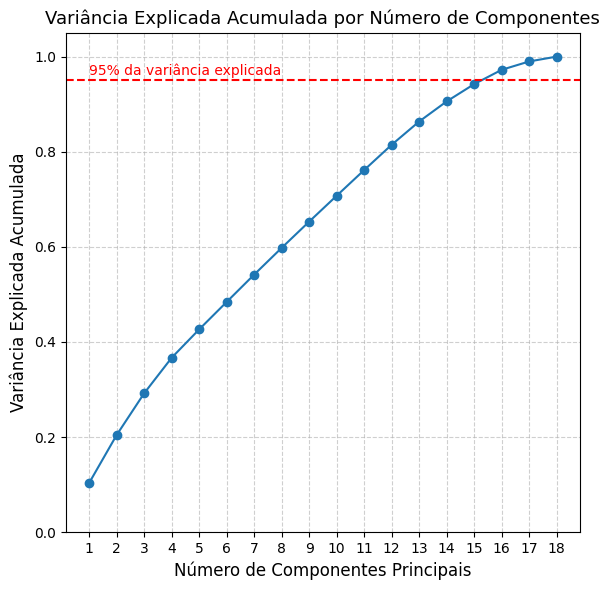

In [195]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=X_sample.shape[1])
pca.fit(X_sample)

cumulative_variance = pca.explained_variance_ratio_.cumsum()


plt.figure(figsize=(6, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')

plt.axhline(y=0.95, color='red', linestyle='--')
plt.text(
    x=1, y=0.955, 
    s="95% da variância explicada", 
    color='red', fontsize=10, 
    verticalalignment='bottom'
)

plt.title("Variância Explicada Acumulada por Número de Componentes", fontsize=13)
plt.xlabel("Número de Componentes Principais", fontsize=12)
plt.ylabel("Variância Explicada Acumulada", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


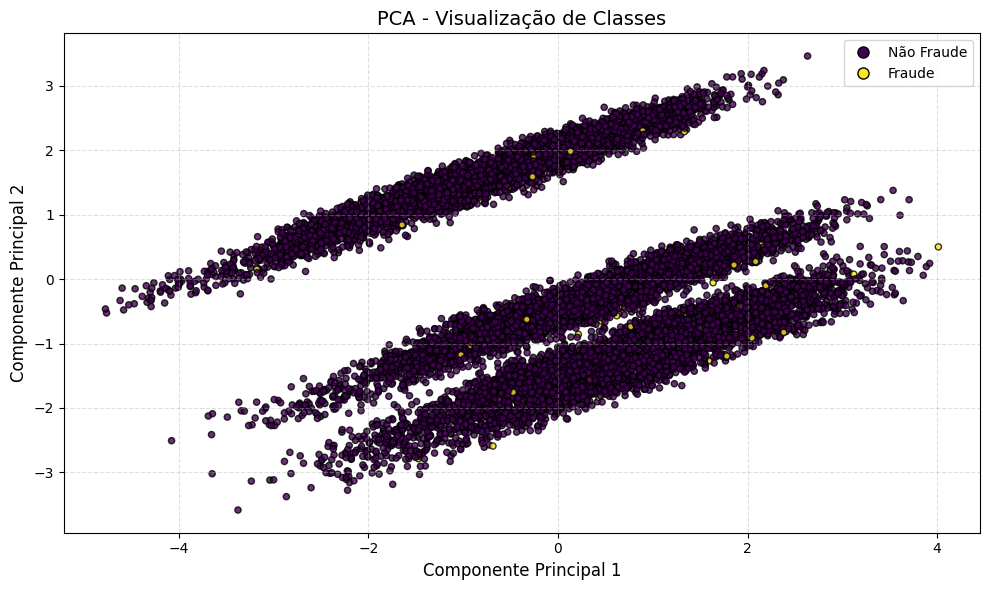

In [196]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_PCA = pca.transform(X_sample)

colors = ListedColormap(["#440154", "#fde725"])

plt.figure(figsize=(10, 6))
plt.scatter(
    X_PCA[:,0], X_PCA[:,1], 
    c=y_true,
    cmap=colors,
    edgecolor='k',
    s=20,
    alpha=0.8 )

plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
plt.title("PCA - Visualização de Classes", fontsize=14)

classes = ["Não Fraude", "Fraude"]
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      label=cls, markersize=8,
                      markerfacecolor=colors(i), markeredgecolor='k')
           for i, cls in enumerate(classes)]
plt.legend(handles=handles, loc="best")

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## **5.2. t-SNE**

perplexity=1


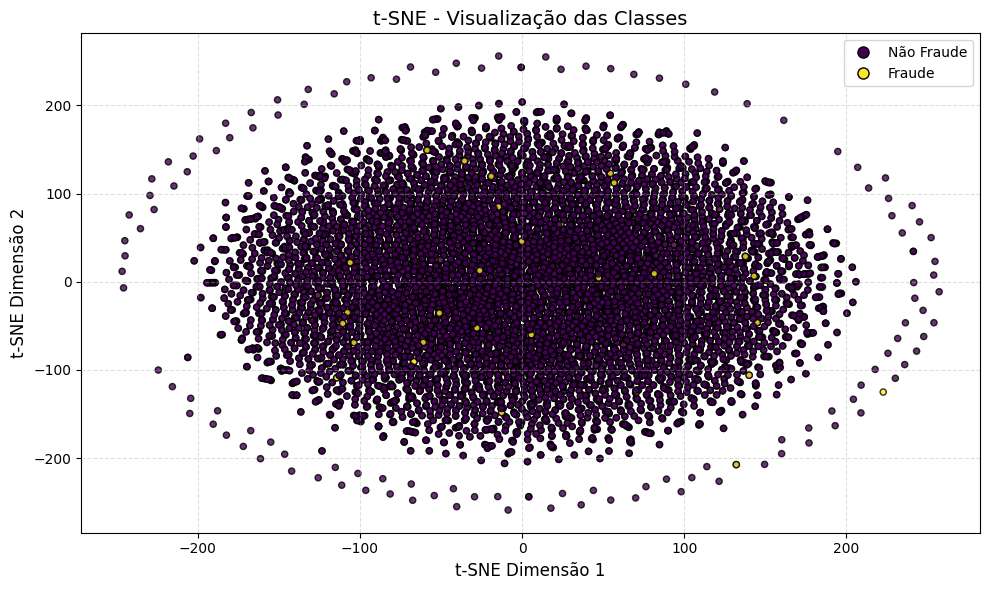

perplexity=3


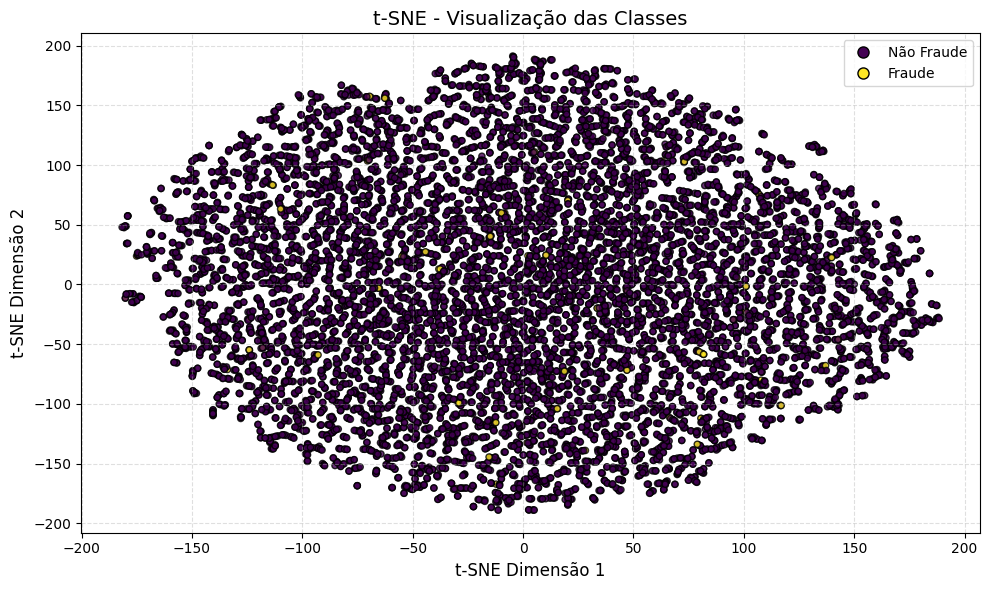

perplexity=5


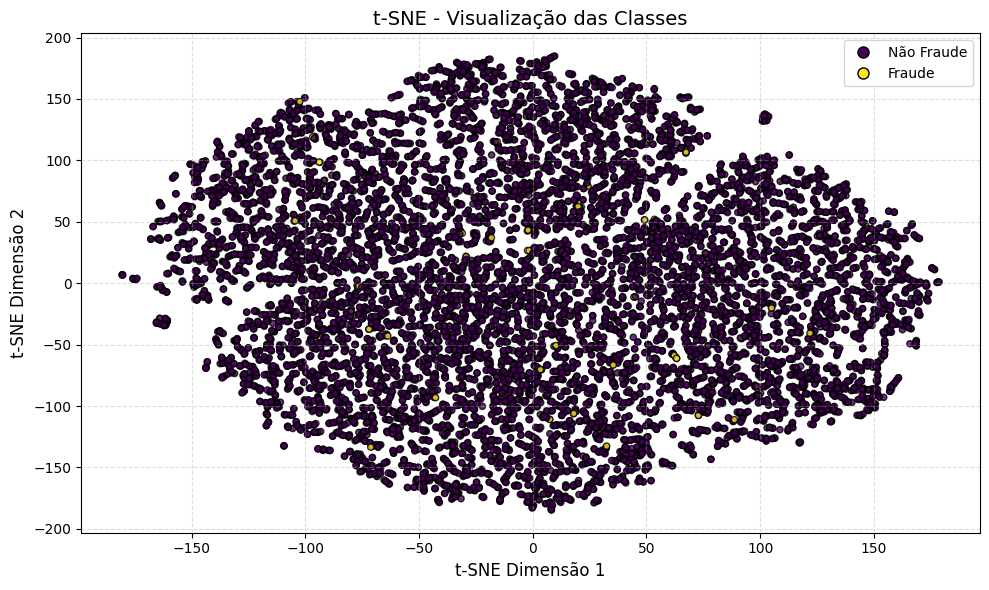

perplexity=10


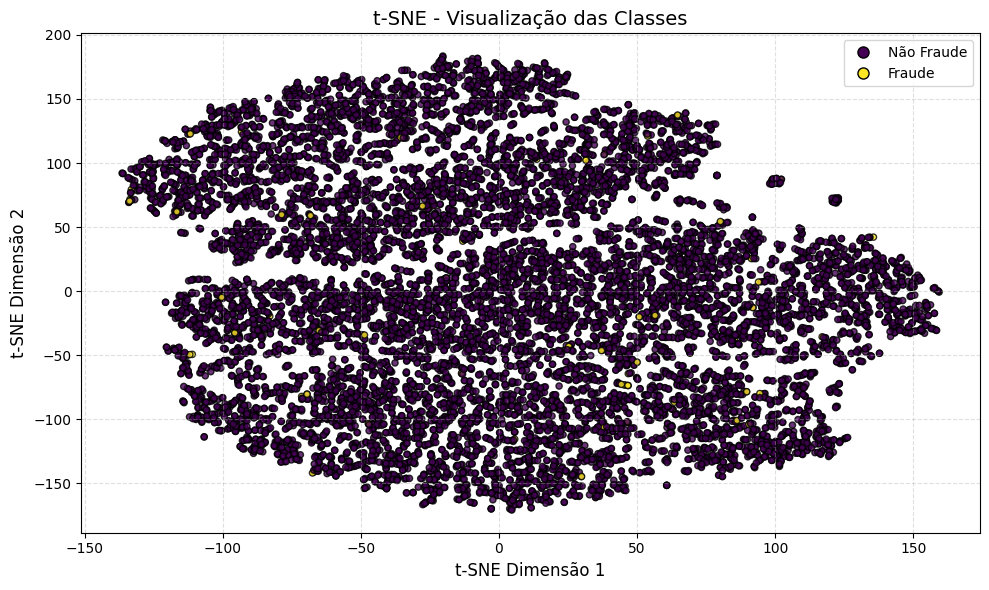

perplexity=20


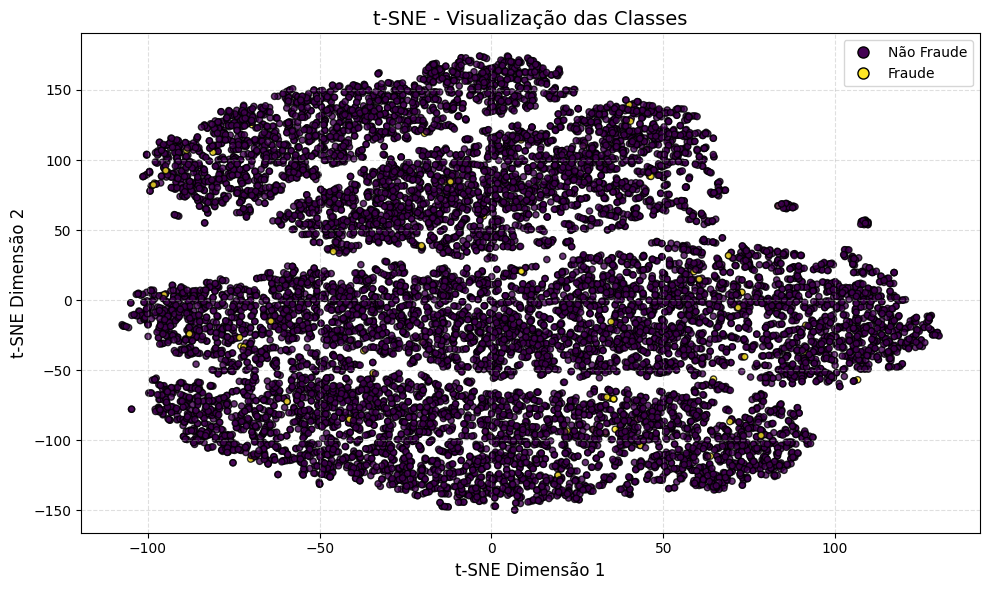

perplexity=30


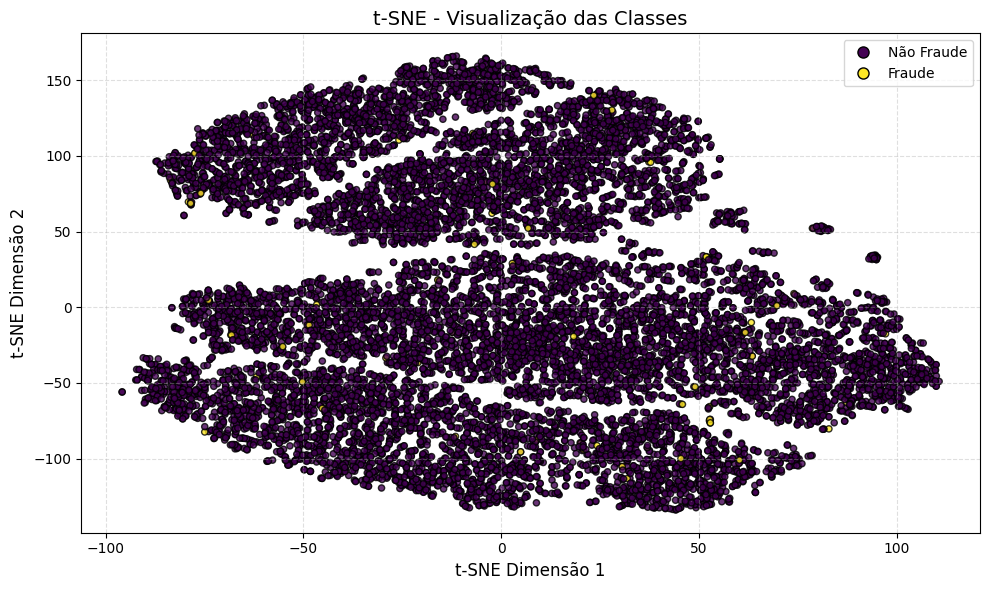

perplexity=50


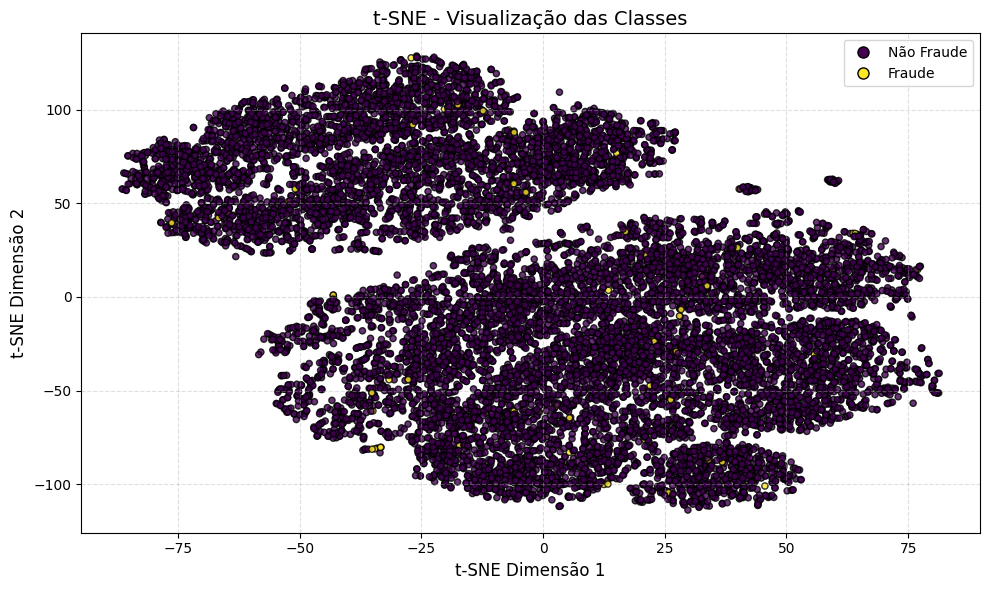

In [197]:
import sklearn.manifold as manifold
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


initPar = 'pca'
# initPar = 'random'

for perplexity in [1,3,5,10,20,30,50]:
    print(f'{perplexity=}')
    t_sne = manifold.TSNE(
        n_components=2,
        perplexity=perplexity,
        init=initPar,
        max_iter=2500,
        #random_state=0
        )
    X_t_sne = t_sne.fit_transform(X_sample)


    colors = ListedColormap(["#440154", "#fde725"])

    plt.figure(figsize=(10, 6))
    plt.scatter(
        X_t_sne[:,0], X_t_sne[:,1], 
        c=y_true,
        cmap=colors,
        edgecolor='k',
        s=20,
        alpha=0.8 )

    plt.xlabel("t-SNE Dimensão 1", fontsize=12)
    plt.ylabel("t-SNE Dimensão 2", fontsize=12)
    plt.title("t-SNE - Visualização das Classes", fontsize=14)

    classes = ["Não Fraude", "Fraude"]
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                        label=cls, markersize=8,
                        markerfacecolor=colors(i), markeredgecolor='k')
            for i, cls in enumerate(classes)]
    plt.legend(handles=handles, loc="best")

    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

## **5.3. UMAP**

/home/ilfn/.pyenv/versions/credit_card_transaction_fraud_detection/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ilfn/.pyenv/versions/credit_card_transaction_fraud_detection/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


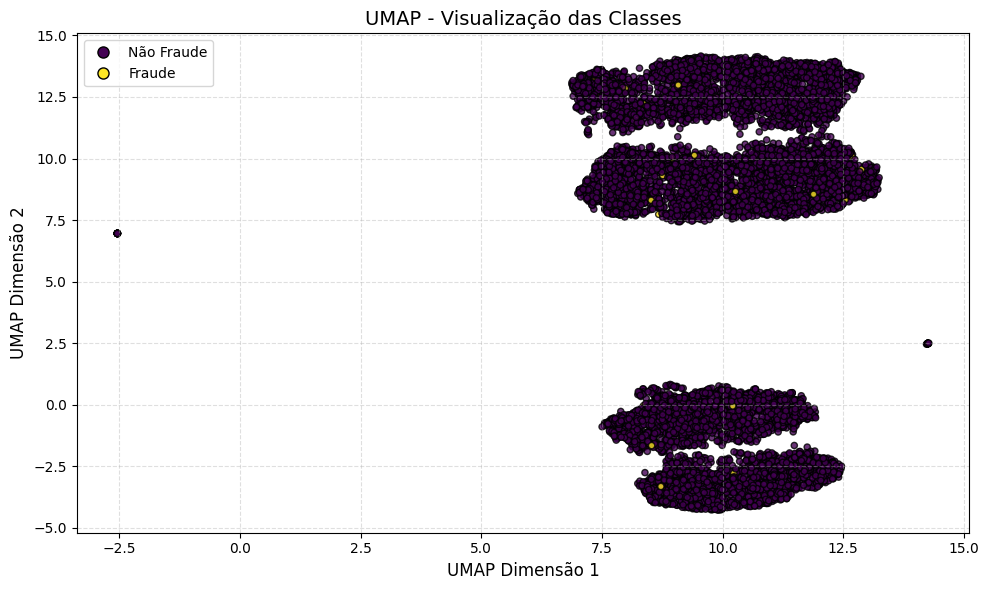

In [198]:
import umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Aplica UMAP
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,      # ajuste conforme desejado
    min_dist=0.1,        # controle da compactação
    metric='euclidean',  # distância (padrão)
    random_state=42
)
X_umap = umap_model.fit_transform(X_sample)

# Cores
colors = ListedColormap(["#440154", "#fde725"])

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=y_true,
    cmap=colors,
    edgecolor='k',
    s=20,
    alpha=0.8
)

# Rótulos adaptados
plt.xlabel("UMAP Dimensão 1", fontsize=12)
plt.ylabel("UMAP Dimensão 2", fontsize=12)
plt.title("UMAP - Visualização das Classes", fontsize=14)

# Legenda
classes = ["Não Fraude", "Fraude"]
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      label=cls, markersize=8,
                      markerfacecolor=colors(i), markeredgecolor='k')
           for i, cls in enumerate(classes)]
plt.legend(handles=handles, loc="best")

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
